In [1]:
import sys, os
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys-dmm/')
from src.utils.aux import flatten_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from projects.ephys.population import Population
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib as mpl
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
%matplotlib inline

In [2]:
mpl.rcParams.update({'font.size': 23})

In [3]:
schematic_directory = '/home/niell_lab/Documents/figures/paper_schematics/'

In [4]:
hffm_savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/'
hffm_pop = Population(hffm_savepath)
hffm_pop.load_from_pickle(stage='population')

reading data from /home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/pooled_ephys_population_update_120621.pickle


In [5]:
ltdk_savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/120221_lightdark/'
ltdk_pop = Population(ltdk_savepath)
ltdk_pop.load_from_pickle(stage='population')

reading data from /home/niell_lab/data/freely_moving_ephys/batch_files/120221_lightdark/pooled_ephys_population_update_120621.pickle


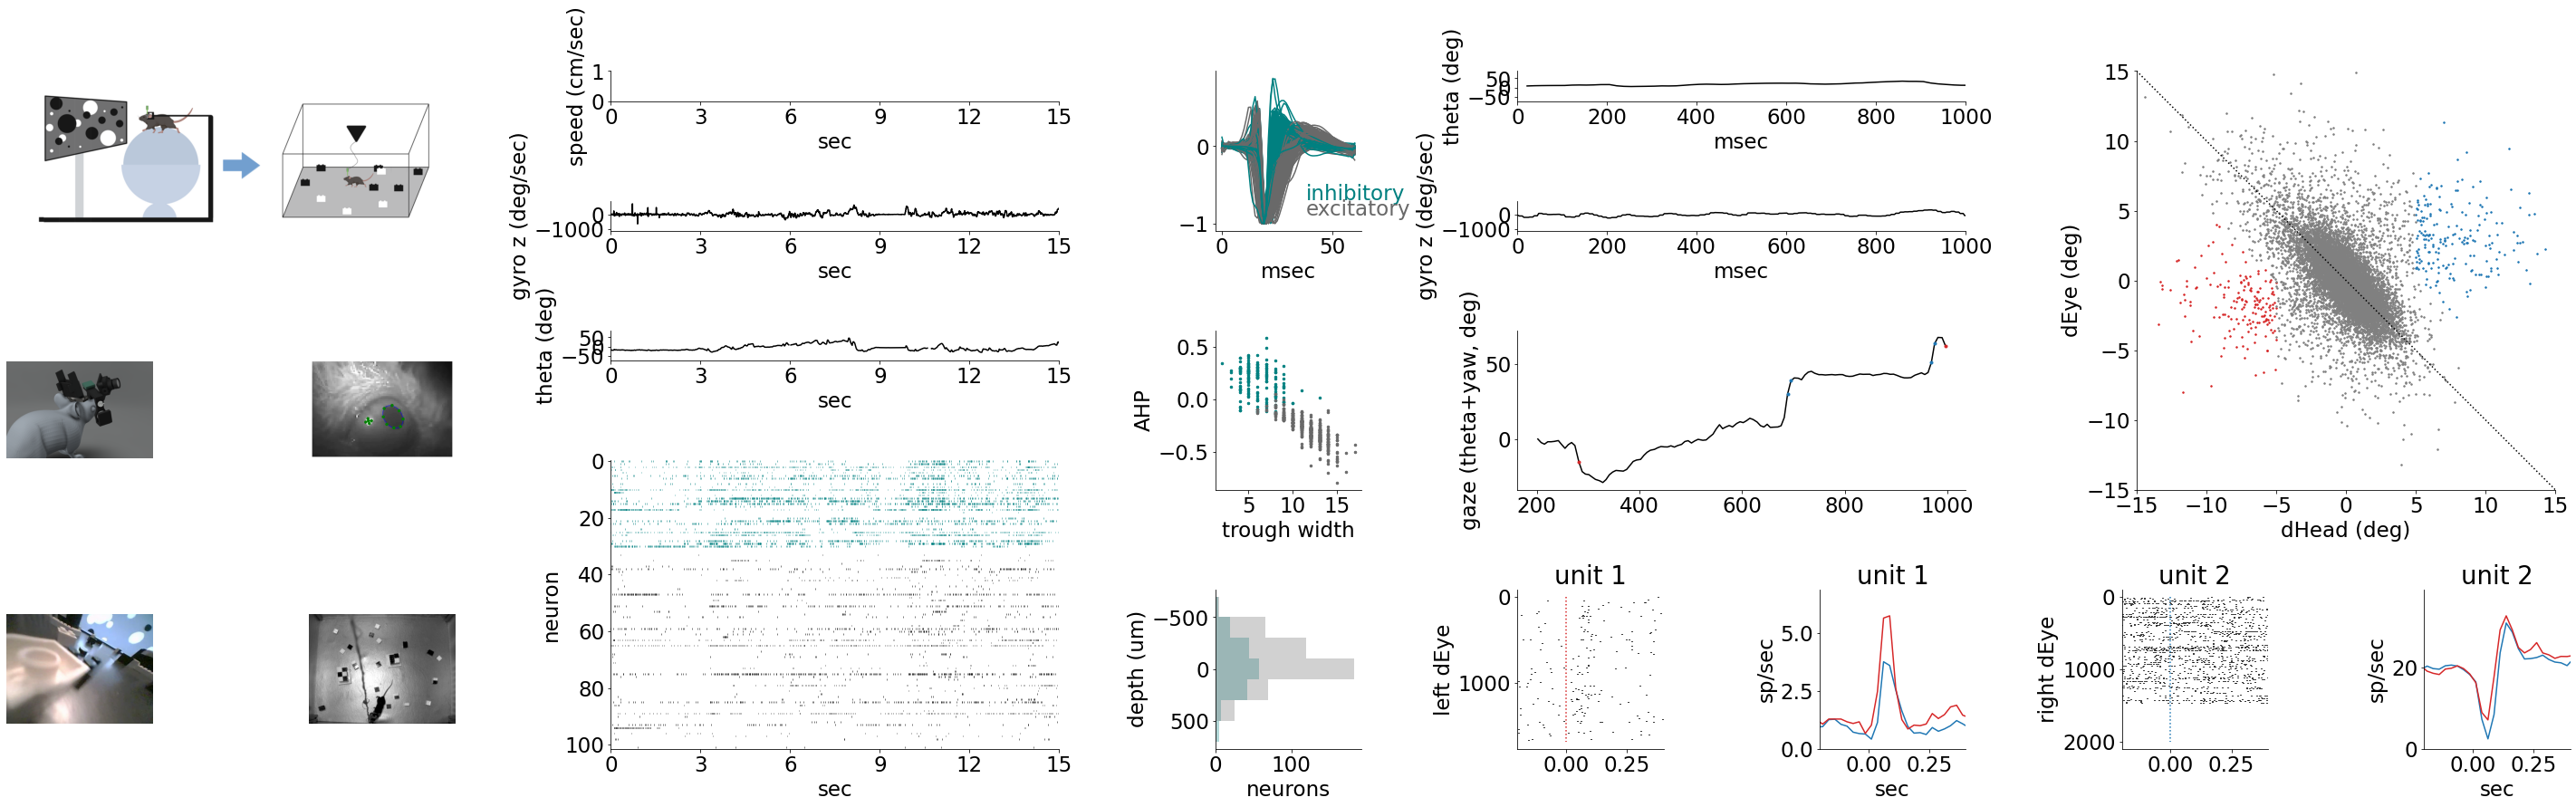

In [6]:
# fig 1: experimental design, example data, saccade and fixate
demo_data = hffm_pop.data[hffm_pop.data['session']=='102621_J558NC_control_Rig2']
start = 160 # sec from start of recording

fig1 = plt.figure(constrained_layout=True, figsize=(40,12))
spec1 = gridspec.GridSpec(ncols=9, nrows=6, figure=fig1)

# experimental design box
ax_head_diagram = fig1.add_subplot(spec1[2:4,0])
ax_eye_frame = fig1.add_subplot(spec1[2:4,1])
ax_world_frame = fig1.add_subplot(spec1[4:6,0])
ax_top_frame = fig1.add_subplot(spec1[4:6,1])
ax_hf2fm = fig1.add_subplot(spec1[0:2,0:2])

# example data box
ax_top_speed = fig1.add_subplot(spec1[0,2:4])
ax_gyro_z = fig1.add_subplot(spec1[1,2:4])
ax_theta = fig1.add_subplot(spec1[2,2:4])
ax_raster = fig1.add_subplot(spec1[3:,2:4])

# electrophysiology
ax_celltype = fig1.add_subplot(spec1[0:2,4])
ax_ahp_width = fig1.add_subplot(spec1[2:4,4])
ax_depth = fig1.add_subplot(spec1[4:6,4])

# saccade and fixate box
ax_theta_sacc = fig1.add_subplot(spec1[0,5:7])
ax_gyro_z_sacc = fig1.add_subplot(spec1[1,5:7])
ax_gaze_sacc = fig1.add_subplot(spec1[2:4,5:7])

ax_deye_dhead_sacc = fig1.add_subplot(spec1[0:4,7:9])

ax_u1_dEye_raster = fig1.add_subplot(spec1[4:6,5])
ax_u1_dEye_psth = fig1.add_subplot(spec1[4:6,6])

ax_u2_dEye_raster = fig1.add_subplot(spec1[4:6,7])
ax_u2_dEye_psth = fig1.add_subplot(spec1[4:6,8])

ax_head_diagram.imshow(plt.imread(os.path.join(schematic_directory, 'gear_3d_model1.png')))
ax_head_diagram.axis('off')

ax_hf2fm.imshow(plt.imread(os.path.join(schematic_directory, 'hf_to_fm.png')))
ax_hf2fm.axis('off')

ax_eye_frame.imshow(plt.imread(os.path.join(schematic_directory, 'eye_ellipse.png')))
ax_eye_frame.axis('off')

ax_world_frame.imshow(plt.imread(os.path.join(schematic_directory, 'world_frame.png')))
ax_world_frame.axis('off')

ax_top_frame.imshow(plt.imread(os.path.join(schematic_directory, 'topdown_frame_bright.png')))
ax_top_frame.axis('off')

for ind, row in hffm_pop.data.iterrows():
    if row['exc_or_inh'] == 'inh' and np.max(row['norm_waveform'])<1:
        ax_celltype.plot(row['norm_waveform'], 'teal')
    elif row['exc_or_inh'] == 'exc' and np.max(row['norm_waveform'])<1:
        ax_celltype.plot(row['norm_waveform'], 'dimgray')
ax_celltype.set_xlabel('msec')
ax_celltype.annotate('inhibitory', xy=[38,-0.7], color='teal')
ax_celltype.annotate('excitatory', xy=[38,-0.9], color='dimgray')

ax_ahp_width.plot(hffm_pop.data['waveform_trough_width'][hffm_pop.data['waveform_peak'] < 0][hffm_pop.data['exc_or_inh']=='inh'],
                     hffm_pop.data['AHP'][hffm_pop.data['waveform_peak'] < 0][hffm_pop.data['exc_or_inh']=='inh'], '.', color='teal', markersize=5)
ax_ahp_width.plot(hffm_pop.data['waveform_trough_width'][hffm_pop.data['waveform_peak'] < 0][hffm_pop.data['exc_or_inh']=='exc'],
                     hffm_pop.data['AHP'][hffm_pop.data['waveform_peak'] < 0][hffm_pop.data['exc_or_inh']=='exc'], '.', color='dimgray', markersize=5)
ax_ahp_width.set_ylabel('AHP')
ax_ahp_width.set_xlabel('trough width')

ax_depth.hist(hffm_pop.data['hf1_wn_depth_from_layer5'][hffm_pop.data['exc_or_inh']=='inh'], color='teal', bins=np.arange(-700,800,200), alpha=0.3, orientation='horizontal')
ax_depth.hist(hffm_pop.data['hf1_wn_depth_from_layer5'][hffm_pop.data['exc_or_inh']=='exc'], color='dimgray', bins=np.arange(-700,800,200), alpha=0.3, orientation='horizontal')
ax_depth.set_ylabel('depth (um)')
ax_depth.set_xlabel('neurons')
ax_depth.invert_yaxis()
# ax_depth.plot([0,10],[0,0],'k')

# ax_top_speed.plot(demo_data['fm1_eyeT'].iloc[0], demo_data['fm1_theta'].iloc[0], 'k')
ax_top_speed.set_xlim([start, start+15])
ax_top_speed.set_ylabel('speed (cm/sec)')
ax_top_speed.set_xticks(ticks=np.linspace(start, start+15, 6))
ax_top_speed.set_xticklabels(labels=np.linspace(0,15,6).astype(int))
ax_top_speed.set_xlabel('sec')

ax_theta.plot(demo_data['fm1_eyeT'].iloc[0], demo_data['fm1_theta'].iloc[0], 'k')
ax_theta.set_xlim([start, start+15])
ax_theta.set_ylabel('theta (deg)')
ax_theta.set_xticks(ticks=np.linspace(start, start+15, 6))
ax_theta.set_xticklabels(labels=np.linspace(0,15,6).astype(int))
ax_theta.set_xlabel('sec')

gyro_z_data = (demo_data['fm1_gz'].iloc[0] - np.nanmean(demo_data['fm1_gz'].iloc[0])) * 400
ax_gyro_z.plot(demo_data['fm1_accT'].iloc[0], gyro_z_data, 'k')
ax_gyro_z.set_xlim([start, start+15])
ax_gyro_z.set_ylabel('gyro z (deg/sec)')
ax_gyro_z.set_xticks(ticks=np.linspace(start, start+15, 6))
ax_gyro_z.set_xticklabels(labels=np.linspace(0,15,6).astype(int))
ax_gyro_z.set_xlabel('sec')

probe = demo_data['probe_name'].iloc[0]
if '64' in probe:
    sh_num = 2
elif '128' in probe:
    sh_num = 4
inh_goodcells = demo_data[demo_data['exc_or_inh']=='inh']
sh0 = np.arange(0,len(inh_goodcells.index)+sh_num,sh_num)
inh_full_raster = np.array([]).astype(int)
for sh in range(sh_num):
    inh_full_raster = np.concatenate([inh_full_raster, sh0+sh])
for i, ind in enumerate(inh_goodcells.index):
    i = inh_full_raster[i]
    ax_raster.vlines(inh_goodcells.at[ind,'fm1_spikeT'],i-0.25,i+0.25,color='teal',linewidth=0.5)

exc_goodcells = demo_data[demo_data['exc_or_inh']=='exc']
sh0 = np.arange(0,len(exc_goodcells.index)+sh_num,sh_num)
exc_full_raster = np.array([]).astype(int)
for sh in range(sh_num):
    exc_full_raster = np.concatenate([exc_full_raster, sh0+sh])
for i, ind in enumerate(exc_goodcells.index):
    i = exc_full_raster[i] + np.size(inh_full_raster,0)
    ax_raster.vlines(exc_goodcells.at[ind,'fm1_spikeT'],i-0.25,i+0.25, color='k',linewidth=0.5)

n_units = len(exc_goodcells) + len(inh_goodcells)
ax_raster.set_ylim(n_units+0.5, -.5)
ax_raster.set_xlim(start, start+15)
ax_raster.set_xlabel('sec')
ax_raster.set_ylabel('neuron')
ax_raster.set_xticks(ticks=np.linspace(start, start+15, 6))
ax_raster.set_xticklabels(labels=np.linspace(0,15,6).astype(int))

start_saccfix = 166

ax_theta_sacc.plot(demo_data['fm1_eyeT'].iloc[0], demo_data['fm1_theta'].iloc[0], 'k')
ax_theta_sacc.set_xlim([start_saccfix, start_saccfix+1])
ax_theta_sacc.set_ylabel('theta (deg)')
ax_theta_sacc.set_xticklabels(np.arange(0,1200,200))
ax_theta_sacc.set_xlabel('msec')

ax_gyro_z_sacc.plot(demo_data['fm1_accT'].iloc[0], gyro_z_data, 'k')
ax_gyro_z_sacc.set_xlim([start_saccfix, start_saccfix+1])
ax_gyro_z_sacc.set_ylabel('gyro z (deg/sec)')
ax_gyro_z_sacc.set_xticklabels(np.arange(0,1200,200))
ax_gyro_z_sacc.set_xlabel('msec')

dgaze = demo_data['fm1_dEye'].iloc[0] + demo_data['fm1_dHead'].iloc[0](demo_data['fm1_eyeT'].iloc[0][:-1])

deye = demo_data['fm1_dEye'].iloc[0]
eyeT = demo_data['fm1_eyeT'].iloc[0]
dhead = demo_data['fm1_dHead'].iloc[0](demo_data['fm1_eyeT'].iloc[0][:-1])
sthresh = 5
right = eyeT[(np.append(deye, 0) > sthresh) & (np.append(dgaze,0) > sthresh)]
left = eyeT[(np.append(deye, 0) < -sthresh) & (np.append(dgaze,0) < -sthresh)]
compinds = [f for f in np.arange(0,len(deye)) if f not in right.frame.values and f not in left.frame.values]
ax_deye_dhead_sacc.plot(deye[right.frame.values][::10], dhead[right.frame.values][::10], '.', color='tab:blue', markersize=3)
ax_deye_dhead_sacc.plot(deye[left.frame.values][::10], dhead[left.frame.values][::10], '.', color='tab:red', markersize=3)
ax_deye_dhead_sacc.plot(deye[compinds][::10], dhead[compinds][::10], '.', color='gray', markersize=3)
ax_deye_dhead_sacc.set_ylabel('dEye (deg)')
ax_deye_dhead_sacc.set_xlabel('dHead (deg)')
ax_deye_dhead_sacc.set_ylim([-15,15])
ax_deye_dhead_sacc.set_xlim([-15,15])
ax_deye_dhead_sacc.set_aspect('equal')
ax_deye_dhead_sacc.plot([-15,15],[15,-15], 'k:')

start_frame = np.nanargmin(np.abs(eyeT - start_saccfix))
dgaze_to_plot = np.nancumsum(dgaze[start_frame:start_frame+120])
rsacc = right[(start_saccfix<right) * (right<(start_saccfix+2))].values
rsacc_inds = [int(np.where(eyeT==i)[0]) for i in rsacc]
lsacc = left[(start_saccfix<left) * (left<(start_saccfix+2))].values
lsacc_inds = [int(np.where(eyeT==i)[0]) for i in lsacc]
ax_gaze_sacc.plot(eyeT[start_frame:start_frame+120], dgaze_to_plot, 'k')
ax_gaze_sacc.plot(eyeT[start_frame:start_frame+120][rsacc_inds-start_frame], dgaze_to_plot[rsacc_inds-start_frame], '.', color='tab:blue', markersize=6)
ax_gaze_sacc.plot(eyeT[start_frame:start_frame+120][lsacc_inds-start_frame], dgaze_to_plot[lsacc_inds-start_frame], '.', color='tab:red', markersize=6)
ax_gaze_sacc.set_xticklabels(np.arange(0,1200,200))
ax_gaze_sacc.set_ylabel('gaze (theta+yaw, deg)')

u1 = 447 # positive response to left
u2 = 604 # biphasic response to right

sp = np.array(hffm_pop.data.loc[u1,'fm1_spikeT'])
ns = np.zeros(len(left)+1)
for n, s in enumerate(left):
    sd = np.abs(sp-np.array(s))<1
    sacc_sp = sp[sd]
    ns = len(sacc_sp)
    ax_u1_dEye_raster.vlines(sacc_sp-np.array(s), n-0.5, n+0.5, color='k')
ax_u1_dEye_raster.set_xlim([-0.2,0.4])
ax_u1_dEye_raster.vlines(0, 0, len(left), linestyles='dotted', color='tab:red')
ax_u1_dEye_raster.invert_yaxis()
ax_u1_dEye_raster.set_ylabel('left dEye')
ax_u1_dEye_raster.set_title('unit 1')

rightavg = hffm_pop.data.loc[u1, 'fm1_upsacc_avg_gaze_shift_dEye']
leftavg = hffm_pop.data.loc[u1, 'fm1_downsacc_avg_gaze_shift_dEye']
ax_u1_dEye_psth.plot(hffm_pop.trange_x, rightavg, color='tab:blue')
ax_u1_dEye_psth.plot(hffm_pop.trange_x, leftavg, color='tab:red')
maxval = np.max(np.maximum(rightavg, leftavg))*1.2
ax_u1_dEye_psth.set_ylim([0, maxval])
ax_u1_dEye_psth.set_xlim([-0.2,0.4])
ax_u1_dEye_psth.set_title('unit 1')
ax_u1_dEye_psth.set_ylabel('sp/sec')
ax_u1_dEye_psth.set_xlabel('sec')
# ax_celltype.annotate('inhibitory', xy=[38,-0.7], color='teal')
# ax_celltype.annotate('excitatory', xy=[38,-0.9], color='dimgray')

sp = np.array(hffm_pop.data.loc[u2,'fm1_spikeT'])
ns = np.zeros(len(right)+1)
for n, s in enumerate(right):
    sd = np.abs(sp-np.array(s))<1
    sacc_sp = sp[sd]
    ns = len(sacc_sp)
    ax_u2_dEye_raster.vlines(sacc_sp-np.array(s), n-0.5, n+0.5, color='k')
ax_u2_dEye_raster.set_xlim([-0.2,0.4])
ax_u2_dEye_raster.vlines(0, 0, len(right), linestyles='dotted', color='tab:blue')
ax_u2_dEye_raster.invert_yaxis()
ax_u2_dEye_raster.set_ylabel('right dEye')
ax_u2_dEye_raster.set_title('unit 2')

rightavg = hffm_pop.data.loc[u2, 'fm1_upsacc_avg_gaze_shift_dEye']
leftavg = hffm_pop.data.loc[u2, 'fm1_downsacc_avg_gaze_shift_dEye']
ax_u2_dEye_psth.plot(hffm_pop.trange_x, rightavg, color='tab:blue')
ax_u2_dEye_psth.plot(hffm_pop.trange_x, leftavg, color='tab:red')
maxval = np.max(np.maximum(rightavg, leftavg))*1.2
ax_u2_dEye_psth.set_ylim([0, maxval])
ax_u2_dEye_psth.set_xlim([-0.2,0.4])
ax_u2_dEye_psth.set_title('unit 2')
ax_u2_dEye_psth.set_ylabel('sp/sec')
ax_u2_dEye_psth.set_xlabel('sec')

fig1.tight_layout()
fig1.savefig('/home/niell_lab/Desktop/fig1_010622.pdf')

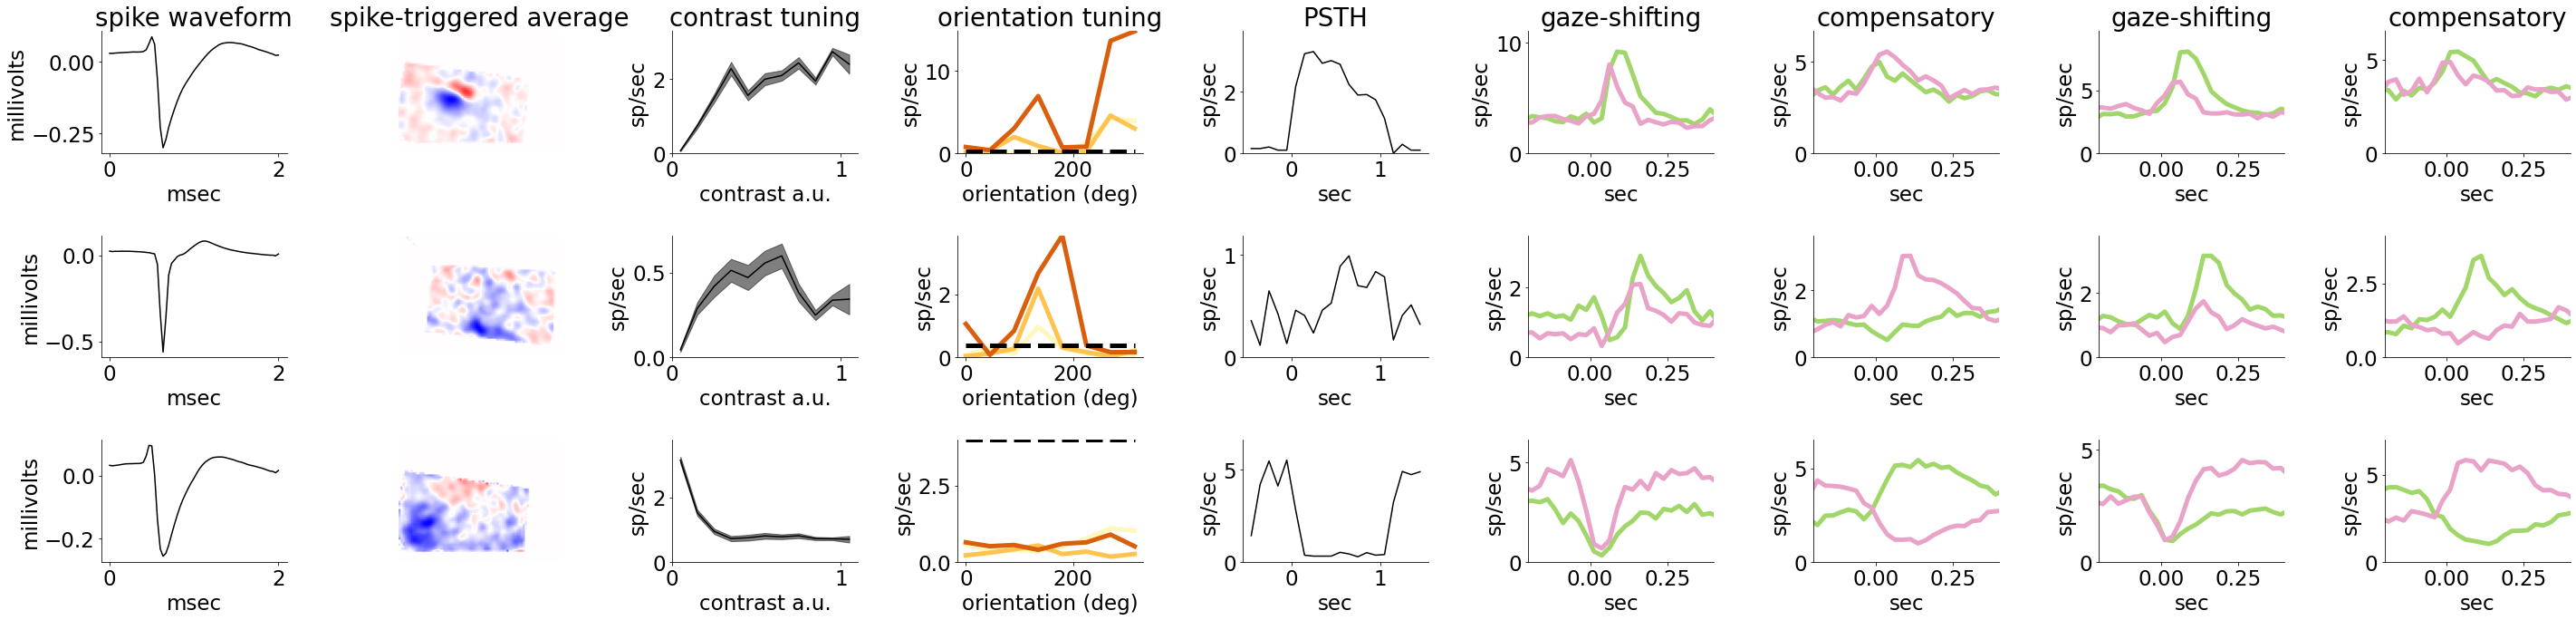

In [30]:
# fig 2: example neurons
example_inds = [569,479,591]

fig2 = plt.figure(constrained_layout=True, figsize=(40,10))
spec2 = gridspec.GridSpec(ncols=9, nrows=3, figure=fig2)

# excitatory box
exc_wvfm = fig2.add_subplot(spec2[0,0])
exc_sta = fig2.add_subplot(spec2[0,1])
exc_crf = fig2.add_subplot(spec2[0,2])
exc_ori = fig2.add_subplot(spec2[0,3])
exc_psth = fig2.add_subplot(spec2[0,4])
exc_eye_gaze = fig2.add_subplot(spec2[0,5])
exc_eye_comp = fig2.add_subplot(spec2[0,6])
exc_head_gaze = fig2.add_subplot(spec2[0,7])
exc_head_comp = fig2.add_subplot(spec2[0,8])

# inhibitory box
inh_wvfm = fig2.add_subplot(spec2[1,0])
inh_sta = fig2.add_subplot(spec2[1,1])
inh_crf = fig2.add_subplot(spec2[1,2])
inh_ori = fig2.add_subplot(spec2[1,3])
inh_psth = fig2.add_subplot(spec2[1,4])
inh_eye_gaze = fig2.add_subplot(spec2[1,5])
inh_eye_comp = fig2.add_subplot(spec2[1,6])
inh_head_gaze = fig2.add_subplot(spec2[1,7])
inh_head_comp = fig2.add_subplot(spec2[1,8])

# supressed by contrast box
sbc_wvfm = fig2.add_subplot(spec2[2,0])
sbc_sta = fig2.add_subplot(spec2[2,1])
sbc_crf = fig2.add_subplot(spec2[2,2])
sbc_ori = fig2.add_subplot(spec2[2,3])
sbc_psth = fig2.add_subplot(spec2[2,4])
sbc_eye_gaze = fig2.add_subplot(spec2[2,5])
sbc_eye_comp = fig2.add_subplot(spec2[2,6])
sbc_head_gaze = fig2.add_subplot(spec2[2,7])
sbc_head_comp = fig2.add_subplot(spec2[2,8])

# waveform
for panel_num, panel in enumerate([exc_wvfm, inh_wvfm, sbc_wvfm]):
    ind = example_inds[panel_num]
    wv = hffm_pop.data['waveform'].iloc[ind]
    panel.plot(np.arange(len(wv))*1000/30000, wv, color='k')
    panel.set_ylabel('millivolts'); panel.set_xlabel('msec')
    if panel_num==0:
        panel.set_title('spike waveform')

# sta
for panel_num, panel in enumerate([exc_sta, inh_sta, sbc_sta]):
    ind = example_inds[panel_num]
    sta = np.reshape(hffm_pop.data['hf1_wn_spike_triggered_average'].iloc[ind],tuple(hffm_pop.data['hf1_wn_sta_shape'].iloc[ind]))
    sta_range = np.max(np.abs(sta))*2
    sta_range = (0.25 if sta_range<0.25 else sta_range)
    panel.imshow(sta, vmin=-sta_range, vmax=sta_range, cmap='seismic')
    panel.axis('off')
    if panel_num==0:
        panel.set_title('spike-triggered average')
    panel.spines['top'].set_visible(True)
    panel.tick_params(top=False, right=False, left=False, bottom=False)
    panel.tick_params(labeltop=False, labelright=False, labelleft=False, labelbottom=False)
        
# contrast tuning
for panel_num, panel in enumerate([exc_crf, inh_crf, sbc_crf]):
    ind = example_inds[panel_num]
    var_cent = hffm_pop.data['hf1_wn_crf_cent'].iloc[ind]
    tuning = hffm_pop.data['hf1_wn_crf_tuning'].iloc[ind]
    tuning_err = hffm_pop.data['hf1_wn_crf_err'].iloc[ind]
    panel.plot(var_cent, tuning, color='k')
    panel.fill_between(var_cent, tuning-tuning_err, tuning+tuning_err, color='k', alpha=0.5)
    panel.set_xlabel('contrast a.u.'); panel.set_ylabel('sp/sec')
    panel.set_ylim(0, np.nanmax(tuning*1.2))
    if panel_num==0:
        panel.set_title('contrast tuning')
        
# orientation tuning
for panel_num, panel in enumerate([exc_ori, inh_ori, sbc_ori]):
    ind = example_inds[panel_num]
    raw_tuning = np.mean(hffm_pop.data['hf3_gratings_ori_tuning'].iloc[ind],2)
    drift_spont = hffm_pop.data['hf3_gratings_drift_spont'].iloc[ind]
    tuning = raw_tuning - drift_spont # subtract off spont rate
    tuning[tuning < 0] = 0 # set to 0 when tuning goes negative (i.e. when firing rate is below spontanious rate)
    maxval = np.nanmax([np.nanmax(raw_tuning), drift_spont])
    panel.set_ylim([0,maxval])
    panel.plot(np.arange(8)*45, raw_tuning[:,0], color='#fff7bc', linewidth=5)
    panel.plot(np.arange(8)*45, raw_tuning[:,1], color='#fec44f', linewidth=5)
    panel.plot(np.arange(8)*45, raw_tuning[:,2], color='#d95f0e', linewidth=5)
    panel.plot([0, 315],[drift_spont, drift_spont], linestyle='dashed', color='k', linewidth=5)
#     panel.annotate('0.02 cpd', xy=[2,maxval], color='tab:blue', fontsize=20)
#     panel.annotate('0.08 cpd', xy=[2,maxval-0.35], color='tab:orange', fontsize=20)
#     panel.annotate('0.32 cpd', xy=[2,maxval-0.7], color='tab:green', fontsize=20)
#     panel.annotate('spont. rate', xy=[2,maxval-1], color='tab:red', fontsize=20)
    if panel_num==0:
        panel.set_title('orientation tuning')
    panel.set_ylabel('sp/sec')
    panel.set_xlabel('orientation (deg)')
        
# gratings psth
for panel_num, panel in enumerate([exc_psth, inh_psth, sbc_psth]):
    ind = example_inds[panel_num]
    psth = hffm_pop.data['hf3_gratings_grating_psth'].iloc[ind]
    panel.plot(hffm_pop.grat_psth_x, psth, 'k')
    panel.set_ylim([0,np.nanmax(psth)*1.2])
    if panel_num==0:
        panel.set_title('PSTH')
    panel.set_ylabel('sp/sec')
    panel.set_xlabel('sec')
    
# gaze-shifting eye movements
for panel_num, panel in enumerate([exc_eye_gaze, inh_eye_gaze, sbc_eye_gaze]):
    ind = example_inds[panel_num]
    rightavg = hffm_pop.data['fm1_upsacc_avg_gaze_shift_dEye'].iloc[ind]
    leftavg = hffm_pop.data['fm1_downsacc_avg_gaze_shift_dEye'].iloc[ind]
    panel.plot(hffm_pop.trange_x, rightavg, color='#a1d76a', linewidth=5)
    panel.plot(hffm_pop.trange_x, leftavg, color='#e9a3c9', linewidth=5)
    maxval = np.max(np.maximum(rightavg, leftavg))*1.2
    panel.set_ylim([0, maxval])
    panel.set_xlim([-0.2,0.4])
    if panel_num==0:
        panel.set_title('gaze-shifting')
    panel.set_ylabel('sp/sec')
    panel.set_xlabel('sec')
        
# compensatory eye movements
for panel_num, panel in enumerate([exc_eye_comp, inh_eye_comp, sbc_eye_comp]):
    ind = example_inds[panel_num]
    rightavg = hffm_pop.data['fm1_upsacc_avg_comp_dEye'].iloc[ind]
    leftavg = hffm_pop.data['fm1_downsacc_avg_comp_dEye'].iloc[ind]
    panel.plot(hffm_pop.trange_x, rightavg, color='#a1d76a', linewidth=5)
    panel.plot(hffm_pop.trange_x, leftavg, color='#e9a3c9', linewidth=5)
    maxval = np.max(np.maximum(rightavg, leftavg))*1.2
    panel.set_ylim([0, maxval])
    panel.set_xlim([-0.2,0.4])
    if panel_num==0:
        panel.set_title('compensatory')
    panel.set_ylabel('sp/sec')
    panel.set_xlabel('sec')
        
# gaze-shifting head movements
for panel_num, panel in enumerate([exc_head_gaze, inh_head_gaze, sbc_head_gaze]):
    ind = example_inds[panel_num]
    rightavg = hffm_pop.data['fm1_upsacc_avg_gaze_shift_dHead'].iloc[ind]
    leftavg = hffm_pop.data['fm1_downsacc_avg_gaze_shift_dHead'].iloc[ind]
    panel.plot(hffm_pop.trange_x, rightavg, color='#a1d76a', linewidth=5)
    panel.plot(hffm_pop.trange_x, leftavg, color='#e9a3c9', linewidth=5)
    maxval = np.max(np.maximum(rightavg, leftavg))*1.2
    panel.set_ylim([0, maxval])
    panel.set_xlim([-0.2,0.4])
    if panel_num==0:
        panel.set_title('gaze-shifting')
    panel.set_ylabel('sp/sec')
    panel.set_xlabel('sec')
        
# compensatory head movements
for panel_num, panel in enumerate([exc_head_comp, inh_head_comp, sbc_head_comp]):
    ind = example_inds[panel_num]
    rightavg = hffm_pop.data['fm1_upsacc_avg_comp_dHead'].iloc[ind]
    leftavg = hffm_pop.data['fm1_downsacc_avg_comp_dHead'].iloc[ind]
    panel.plot(hffm_pop.trange_x, rightavg, color='#a1d76a', linewidth=5)
    panel.plot(hffm_pop.trange_x, leftavg, color='#e9a3c9', linewidth=5)
    maxval = np.max(np.maximum(rightavg, leftavg))*1.2
    panel.set_ylim([0, maxval])
    panel.set_xlim([-0.2,0.4])
    if panel_num==0:
        panel.set_title('compensatory')
    panel.set_ylabel('sp/sec')
    panel.set_xlabel('sec')
        
fig2.tight_layout()
fig2.savefig('/home/niell_lab/Desktop/fig2_010622.pdf')

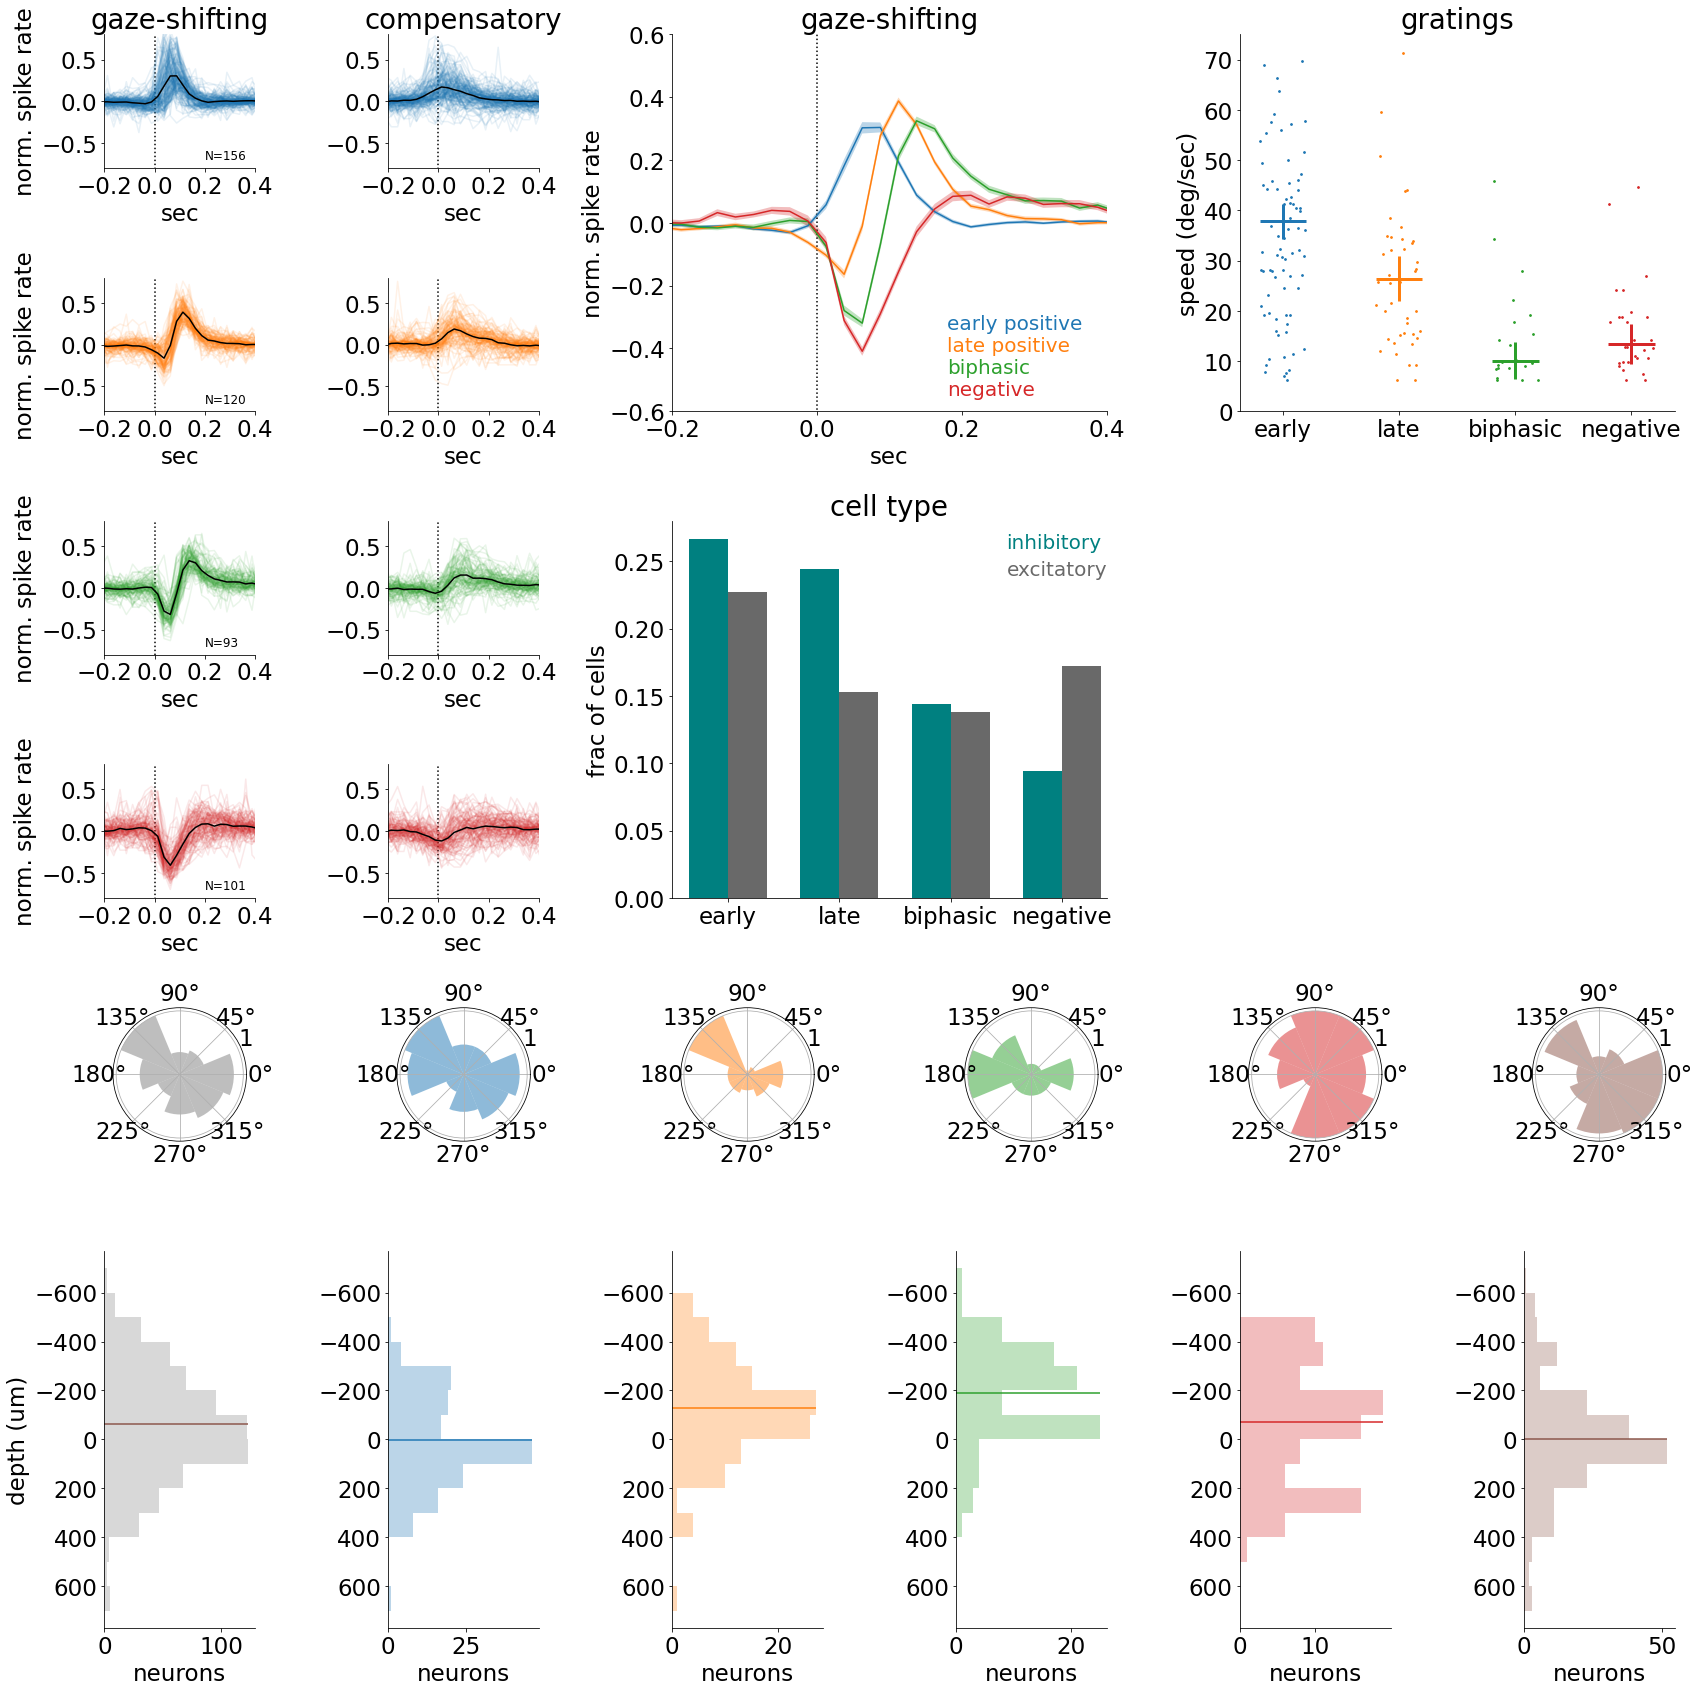

In [5]:
# fig 3: movement clusters in the light
fig3 = plt.figure(constrained_layout=True, figsize=(24,24))
spec3 = gridspec.GridSpec(ncols=6, nrows=7, figure=fig3)

ax_early_gaze = fig3.add_subplot(spec3[0,0])
ax_late_gaze = fig3.add_subplot(spec3[1,0])
ax_biphasic_gaze = fig3.add_subplot(spec3[2,0])
ax_negative_gaze = fig3.add_subplot(spec3[3,0])
ax_early_comp = fig3.add_subplot(spec3[0,1])
ax_late_comp = fig3.add_subplot(spec3[1,1])
ax_biphasic_comp = fig3.add_subplot(spec3[2,1])
ax_negative_comp = fig3.add_subplot(spec3[3,1])
ax_all_psth = fig3.add_subplot(spec3[0:2,2:4])
ax_celltype = fig3.add_subplot(spec3[2:4,2:4])
ax_grat_speed = fig3.add_subplot(spec3[0:2,4:6])

ax_depth_all = fig3.add_subplot(spec3[5:7,0])
ax_depth_early = fig3.add_subplot(spec3[5:7,1])
ax_depth_late = fig3.add_subplot(spec3[5:7,2])
ax_depth_biphasic = fig3.add_subplot(spec3[5:7,3])
ax_depth_negative = fig3.add_subplot(spec3[5:7,4])
ax_depth_unresponsive = fig3.add_subplot(spec3[5:7,5])

ax_dir_all = fig3.add_subplot(spec3[4,0], projection='polar')
ax_dir_early = fig3.add_subplot(spec3[4,1], projection='polar')
ax_dir_late = fig3.add_subplot(spec3[4,2], projection='polar')
ax_dir_biphasic = fig3.add_subplot(spec3[4,3], projection='polar')
ax_dir_negative = fig3.add_subplot(spec3[4,4], projection='polar')
ax_dir_unresponsive = fig3.add_subplot(spec3[4,5], projection='polar')

psth_colors = ['tab:blue','tab:orange','tab:green','tab:red']
psth_keys = ['early','late','biphasic','negative']
use_movement_type = 'norm_deflection_at_pref_direction'
for panelnum, panel in enumerate([ax_early_gaze, ax_late_gaze, ax_biphasic_gaze, ax_negative_gaze,
                                  ax_early_comp, ax_late_comp, ax_biphasic_comp, ax_negative_comp]):
    if panelnum==0:
        panel.set_title('gaze-shifting')
    elif panelnum==4:
        panel.set_title('compensatory')
        use_movement_type = 'norm_deflection_at_opp_direction_comp'
    color = psth_colors[panelnum%4]
    psth_key = psth_keys[panelnum%4]
    all_psth = flatten_series(hffm_pop.data[use_movement_type][hffm_pop.data['movement_psth_type_simple']==psth_key])
    for i in range(len(all_psth)):
        panel.plot(hffm_pop.trange_x, all_psth[i], color=color, alpha=0.1)
    panel.plot(hffm_pop.trange_x, np.nanmean(all_psth,0), color='k')
    panel.set_xlabel('sec')
    panel.set_ylim([-0.8,0.8])
    panel.set_xlim([-0.2,0.4])
    panel.set_xticks(np.arange(-0.2,0.4,0.2))
    panel.vlines(0,-1,1,linestyles='dotted',colors='k')
    if panelnum<4:
        panel.annotate('N='+str(len(all_psth)), xy=[0.2,-0.7], color='k', fontsize=12)
        panel.set_ylabel('norm. spike rate')

for count, label in enumerate(psth_keys):
    cluster = flatten_series(hffm_pop.data['norm_deflection_at_pref_direction'][hffm_pop.data['movement_psth_type_simple']==label])
    cluster_mean = np.nanmean(cluster, 0)
    cluster_stderr = np.std(cluster,0) / np.sqrt(np.size(cluster,0))
    ax_all_psth.plot(hffm_pop.trange_x, cluster_mean)
    ax_all_psth.fill_between(hffm_pop.trange_x, cluster_mean-cluster_stderr, cluster_mean+cluster_stderr, alpha=0.3)
ax_all_psth.annotate('early positive', xy=[0.18,-0.34], color='tab:blue', fontsize=20)
ax_all_psth.annotate('late positive', xy=[0.18,-0.41], color='tab:orange', fontsize=20)
ax_all_psth.annotate('biphasic', xy=[0.18,-0.48], color='tab:green', fontsize=20)
ax_all_psth.annotate('negative', xy=[0.18,-0.55], color='tab:red', fontsize=20)
ax_all_psth.set_xlim([-0.2,0.4])
ax_all_psth.set_ylim([-0.6,0.6])
ax_all_psth.vlines(0, -1, 1, linestyles='dotted', colors='k')
ax_all_psth.set_title('gaze-shifting')
ax_all_psth.set_xticks(np.arange(-0.2,0.4,0.2))
ax_all_psth.set_xlabel('sec')
ax_all_psth.set_ylabel('norm. spike rate')

key_data = np.zeros([len(psth_keys),2])
for count, label in enumerate(psth_keys):
    num_inh = len(hffm_pop.data[hffm_pop.data['movement_psth_type_simple']==label][hffm_pop.data['exc_or_inh']=='inh'])
    num_exc = len(hffm_pop.data[hffm_pop.data['movement_psth_type_simple']==label][hffm_pop.data['exc_or_inh']=='exc'])
    if num_inh > 0:
        key_data[count, 0] = num_inh / len(hffm_pop.data[hffm_pop.data['exc_or_inh']=='inh'])
    if num_exc > 0:
        key_data[count, 1] = num_exc / len(hffm_pop.data[hffm_pop.data['exc_or_inh']=='exc'])
width = 0.35
x = np.arange(len(psth_keys))
ax_celltype.bar(x-width/2, key_data[:,0], width=width, label='inhibitory', color='teal')
ax_celltype.bar(x+width/2, key_data[:,1], width=width, label='excitatory', color='dimgray')
ax_celltype.set_xticks(range(4))
ax_celltype.set_xlim([-0.5,3.4])
ax_celltype.set_xticklabels(psth_keys)
ax_celltype.set_ylabel('frac of cells')
ax_celltype.set_title('cell type')
ax_celltype.annotate('inhibitory', xy=[2.5,0.26], color='teal', fontsize=20)
ax_celltype.annotate('excitatory', xy=[2.5,0.24], color='dimgray', fontsize=20)

psth_colors = ['tab:blue','tab:orange','tab:green','tab:red']

for count, label in enumerate(psth_keys):
    grat_speed = hffm_pop.data['grat_speed_dps'][hffm_pop.data['movement_psth_type_simple']==label][hffm_pop.data['responsive_to_gratings']]
    mean = np.nanmedian(grat_speed,0)
    stderr = np.nanstd(grat_speed) / np.sqrt(np.size(grat_speed,0))
    lbound = count-0.2; ubound = count+0.2
    x_jitter = np.random.uniform(lbound, ubound, np.size(grat_speed,0))
    ax_grat_speed.scatter(x_jitter, grat_speed, s=3, color=psth_colors[count])
    ax_grat_speed.hlines(mean, lbound, ubound, linewidth=3, color=psth_colors[count])
    ax_grat_speed.vlines(count, mean-stderr, mean+stderr, linewidth=3, color=psth_colors[count])
ax_grat_speed.set_ylim([0,75])
ax_grat_speed.set_xticks(range(len(psth_keys)))
ax_grat_speed.set_xticklabels(psth_keys)
ax_grat_speed.set_title('gratings')
ax_grat_speed.set_ylabel('speed (deg/sec)')

grat_ori_labels2directions = dict(zip(list(np.arange(8)), list(np.deg2rad((np.arange(0,360,45)-45)%360))))
polar_panels = [ax_dir_early, ax_dir_late, ax_dir_biphasic, ax_dir_negative, ax_dir_unresponsive]
psth_polar_keys = ['early','late','biphasic','negative','unresponsive']
psth_polar_colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:brown']
for count, key in enumerate(psth_polar_keys):
    panel = polar_panels[count]
    hf_pref = hffm_pop.data['best_orientation'][hffm_pop.data['responsive_to_gratings']][hffm_pop.data['movement_psth_type_simple']==key].to_numpy()
    fm_pref = hffm_pop.data['gaze_shift_direction_pref_ind'][hffm_pop.data['responsive_to_gratings']][hffm_pop.data['movement_psth_type_simple']==key].to_numpy()
    fm_pref = np.deg2rad(~fm_pref.astype(bool) * 180)
    hf_hist = np.histogram(np.deg2rad(hf_pref), bins=8, range=(0,2*np.pi))[0]
    fm_hist = np.roll(np.histogram(fm_pref, bins=8, range=(0,2*np.pi))[0],1)
    panel.bar([grat_ori_labels2directions[ori] for ori in range(8)],
                       hf_hist / np.max(hf_hist),
                       width=(2*np.pi)/8,
                       bottom=0,
                       color=psth_polar_colors[count],
                       alpha=0.5)
hf_pref = hffm_pop.data['best_orientation'][hffm_pop.data['responsive_to_gratings']].to_numpy()
hf_pref = hffm_pop.data['best_orientation'][hffm_pop.data['responsive_to_gratings']].to_numpy()
fm_pref = hffm_pop.data['gaze_shift_direction_pref_ind'][hffm_pop.data['responsive_to_gratings']].to_numpy()
hf_hist = np.histogram(np.deg2rad(hf_pref), bins=8, range=(0,2*np.pi))[0]
ax_dir_all.bar([grat_ori_labels2directions[ori] for ori in range(8)],
                   hf_hist / np.max(hf_hist),
                   width=(2*np.pi)/8,
                   bottom=0,
                   color='tab:gray',
                   alpha=0.5)
    
psth_depth_panels = [ax_depth_early, ax_depth_late, ax_depth_biphasic, ax_depth_negative, ax_depth_unresponsive]
for count, key in enumerate(psth_polar_keys):
    panel = psth_depth_panels[count]
    panel.hist(hffm_pop.data['hf1_wn_depth_from_layer5'][hffm_pop.data['movement_psth_type_simple']==key], color=psth_polar_colors[count], bins=np.arange(-700,800,100), alpha=0.3, orientation='horizontal')
    panel.set_xlabel('neurons')
    panel.invert_yaxis()
    a = hffm_pop.data['hf1_wn_depth_from_layer5'][hffm_pop.data['movement_psth_type_simple']==key].to_numpy()
    counts, bins = np.histogram(a, bins=np.arange(-700,800,100))
    panel.hlines(np.nanmean(a), 0, np.max(counts), colors=psth_polar_colors[count])

ax_depth_all.hist(hffm_pop.data['hf1_wn_depth_from_layer5'], color='tab:gray', bins=np.arange(-700,800,100), alpha=0.3, orientation='horizontal')
ax_depth_all.set_ylabel('depth (um)')
ax_depth_all.set_xlabel('neurons')
ax_depth_all.invert_yaxis()
a = hffm_pop.data['hf1_wn_depth_from_layer5'].to_numpy()
counts, bins = np.histogram(a, bins=np.arange(-700,800,100))
ax_depth_all.hlines(np.nanmean(a), 0, np.max(counts), colors=psth_polar_colors[count])

fig3.tight_layout()
fig3.savefig('/home/niell_lab/Desktop/fig3_010522.pdf')

In [6]:
for ind, row in hffm_pop.data.iterrows():
    if row['hf1_wn_crf_tuning'][0]<1:
        hffm_pop.data.at[ind, 'is_SbC'] = False
        hffm_pop.data.at[ind, 'is_grat_trpsth'] = False
        continue
    high_contrast_std = np.std(row['hf1_wn_crf_tuning'][3:])
    hffm_pop.data.at[ind, 'high_contrast_std'] = high_contrast_std
    min_contrast = row['hf1_wn_crf_tuning'][0]
    mid_contrast = row['hf1_wn_crf_tuning'][3]
    max_contrast = row['hf1_wn_crf_tuning'][-1]
    min_mid_mod = (min_contrast - mid_contrast) / (min_contrast + mid_contrast)
    min_max_mod = (min_contrast - max_contrast) / (min_contrast + max_contrast)
    hffm_pop.data.at[ind, 'SbC_min_mid_mod'] = min_mid_mod
    hffm_pop.data.at[ind, 'SbC_min_max_mod'] = min_max_mod
    # gratings psth
    psth = row['hf3_gratings_grating_psth']
    during_stim = psth[(hffm_pop.grat_psth_x<1) * (hffm_pop.grat_psth_x>0)]
    stim_onset = psth[(hffm_pop.grat_psth_x>0) * (hffm_pop.grat_psth_x<0.10)]
    prestim = psth[(hffm_pop.grat_psth_x<0)]
    sbgrat = (np.nanmean(during_stim) - np.nanmean(prestim)) / np.nanmean(prestim)
    hffm_pop.data.at[ind, 'grat_psth_drop'] = sbgrat
    hffm_pop.data.at[ind, 'change_at_gratstim_onset'] = stim_onset - np.mean(prestim)
    hffm_pop.data.at[ind, 'change_during_gratstim'] = np.mean(during_stim) - stim_onset
    if (min_mid_mod>0.25 and sbgrat<0):
        isSbC = True
    else:
        isSbC = False
    if (np.mean(stim_onset) > 2*np.mean(prestim) and np.mean(during_stim) < 0.66*stim_onset):
        isgrat_trpsth = True
    else:
        isgrat_trpsth = False
    hffm_pop.data.at[ind, 'is_SbC'] = isSbC
    hffm_pop.data.at[ind, 'is_grat_trpsth'] = isgrat_trpsth

In [7]:
def scatter_with_jitter(panel, varname, filter_for=None):
    psth_colors = ['#8dd3c7','#bebada','#80b1d3','#fb8072']
    for count, label in enumerate(psth_keys):
        c = psth_colors[count]
        s = hffm_pop.data[varname][hffm_pop.data['movement_psth_type_simple']==label]
        if filter_for is not None:
            s = s[hffm_pop.data[filter_for]]
        lbound = count-0.2; ubound = count+0.2
        x_jitter = np.random.uniform(lbound, ubound, np.size(s,0))
        mean = np.nanmedian(s,0)
        stderr = np.nanstd(s) / np.sqrt(np.size(s,0))
        panel.scatter(x_jitter, s, s=3, color=c)
        panel.hlines(mean, lbound, ubound, linewidth=5, color=c)
        panel.vlines(count, mean-stderr, mean+stderr, linewidth=3, color=c)
    panel.set_xticks(range(len(psth_keys)))
    panel.set_xticklabels(psth_keys)
    return panel

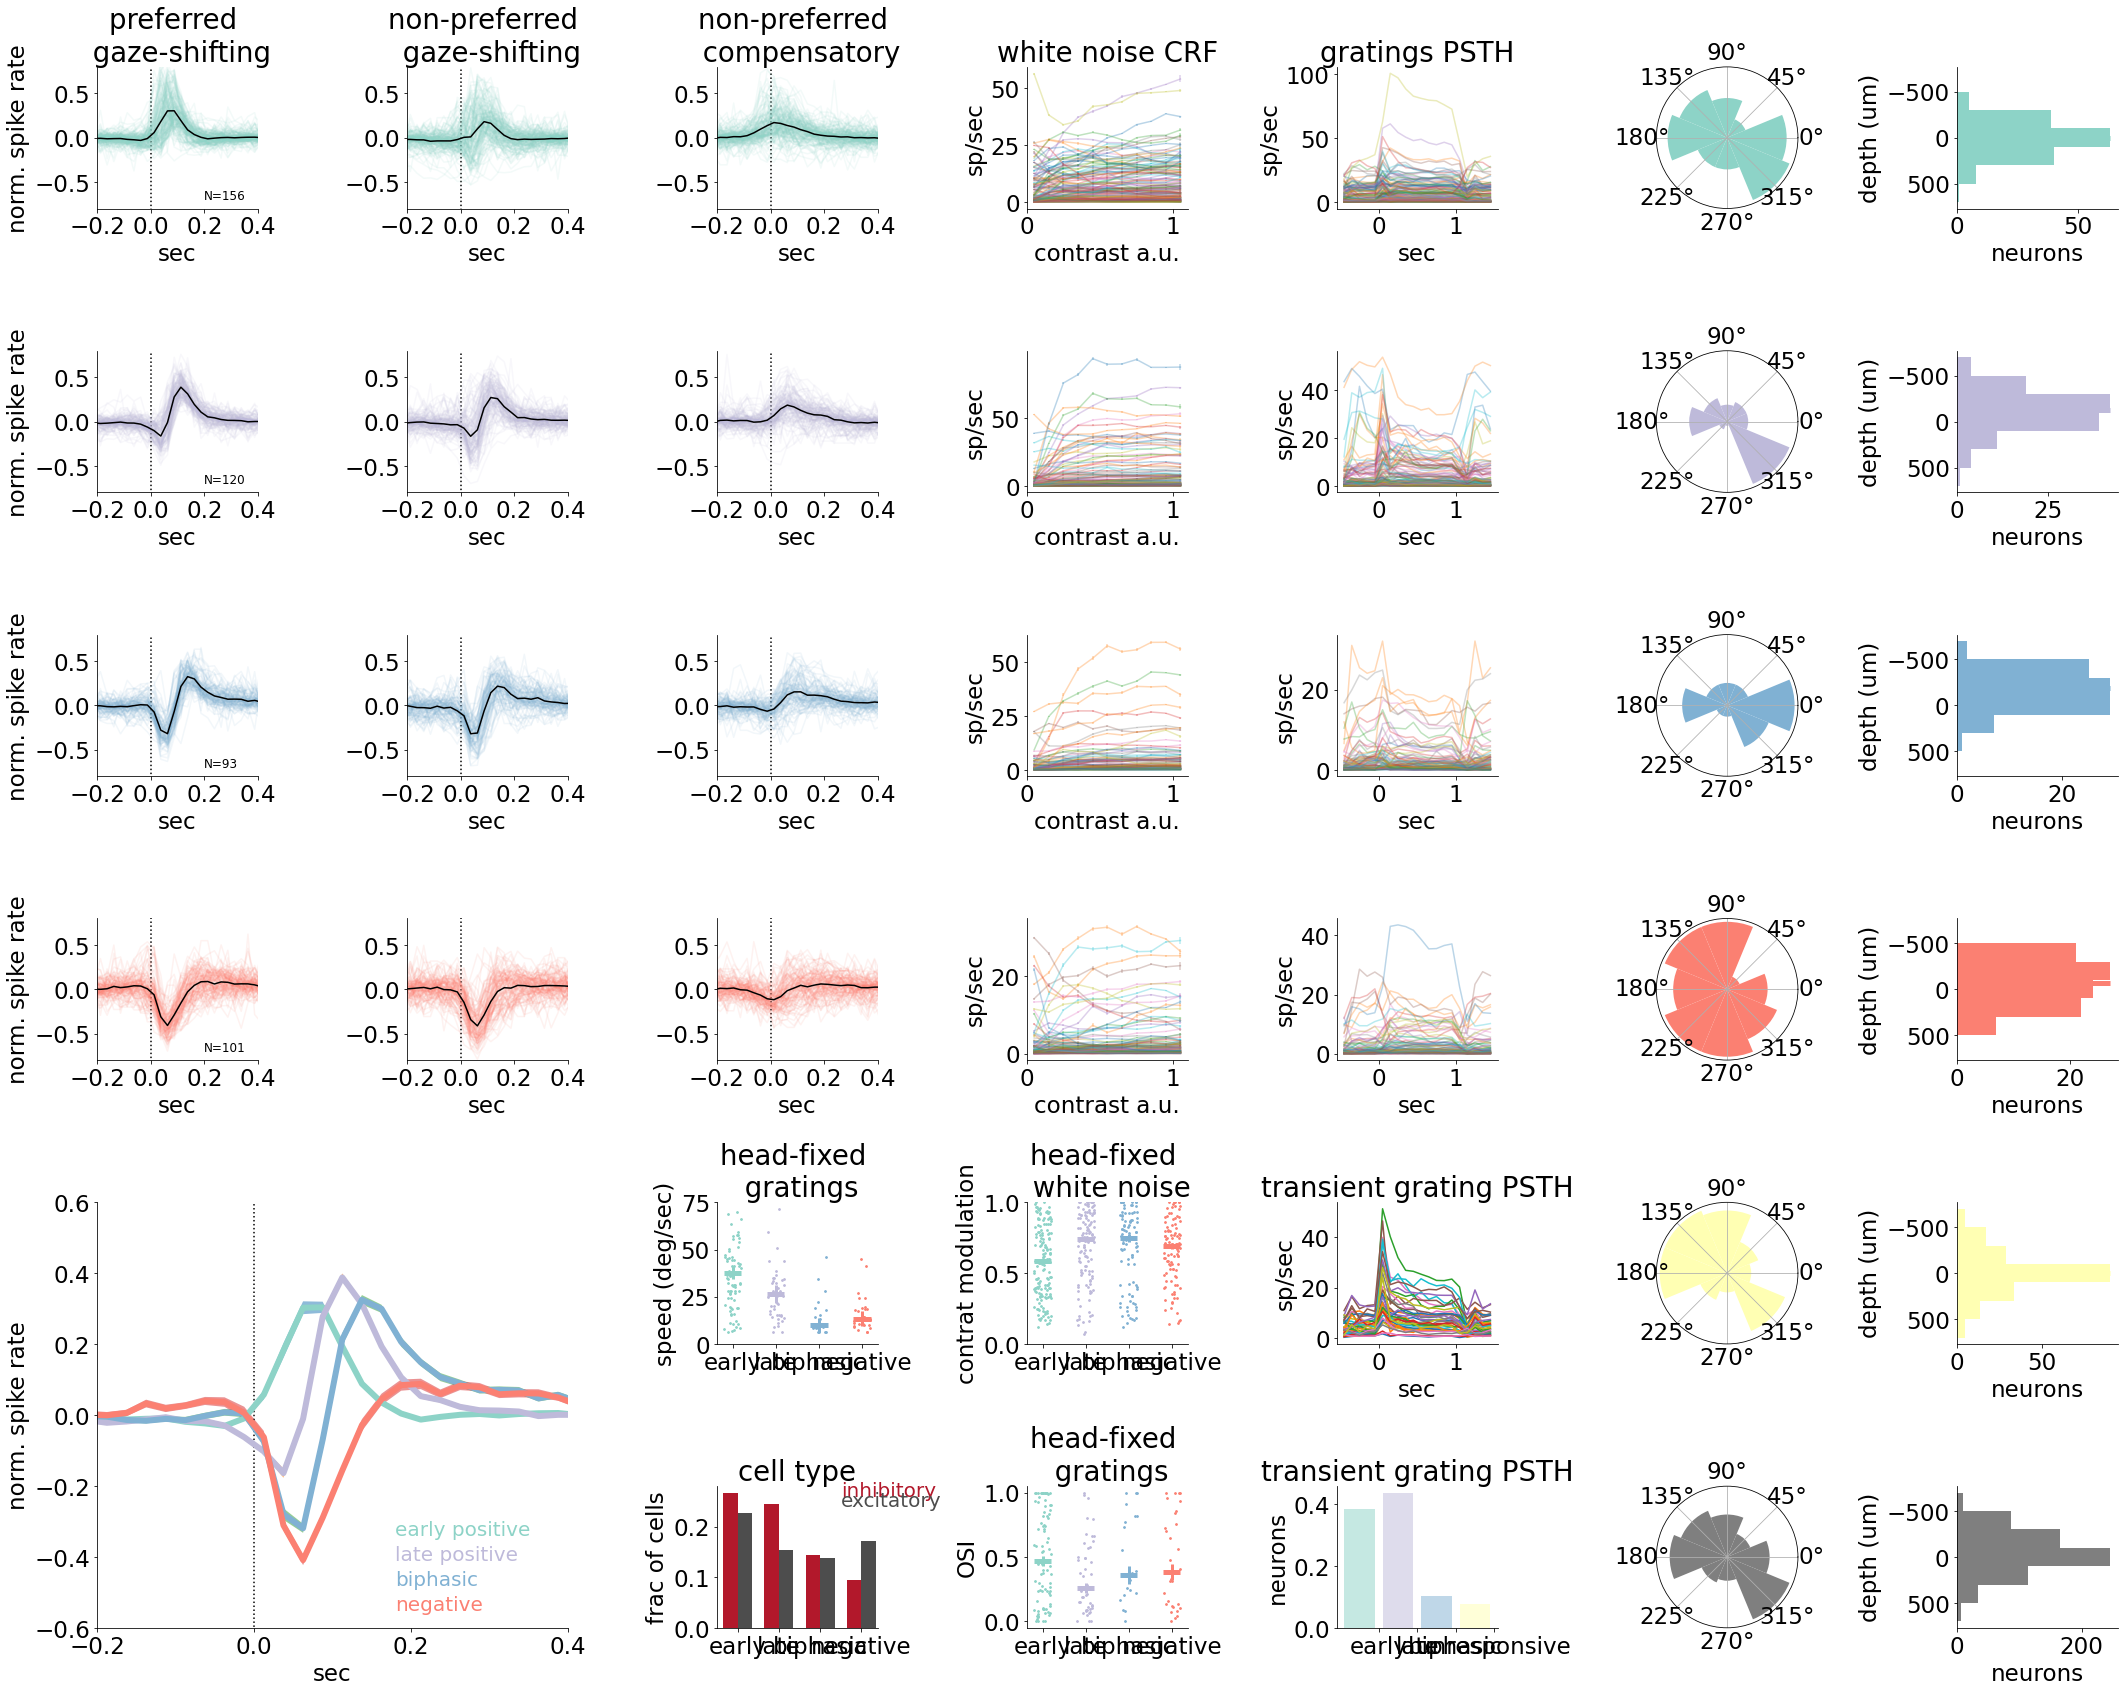

In [8]:
# fig 3: movement clusters in the light
fig3 = plt.figure(constrained_layout=True, figsize=(30,24))
spec3 = gridspec.GridSpec(ncols=7, nrows=6, figure=fig3)

ax_early_gaze_pref = fig3.add_subplot(spec3[0,0])
ax_early_gaze_nonpref = fig3.add_subplot(spec3[0,1])
ax_early_comp = fig3.add_subplot(spec3[0,2])
ax_early_crf = fig3.add_subplot(spec3[0,3])
ax_early_psth = fig3.add_subplot(spec3[0,4])
ax_ds_early = fig3.add_subplot(spec3[0,5], projection='polar')
ax_depth_early = fig3.add_subplot(spec3[0,6])

ax_late_gaze_pref = fig3.add_subplot(spec3[1,0])
ax_late_gaze_nonpref = fig3.add_subplot(spec3[1,1])
ax_late_comp = fig3.add_subplot(spec3[1,2])
ax_late_crf = fig3.add_subplot(spec3[1,3])
ax_late_psth = fig3.add_subplot(spec3[1,4])
ax_ds_late = fig3.add_subplot(spec3[1,5], projection='polar')
ax_depth_late = fig3.add_subplot(spec3[1,6])

ax_biphasic_gaze_pref = fig3.add_subplot(spec3[2,0])
ax_biphasic_gaze_nonpref = fig3.add_subplot(spec3[2,1])
ax_biphasic_comp = fig3.add_subplot(spec3[2,2])
ax_biphasic_crf = fig3.add_subplot(spec3[2,3])
ax_biphasic_psth = fig3.add_subplot(spec3[2,4])
ax_ds_biphasic = fig3.add_subplot(spec3[2,5], projection='polar')
ax_depth_biphasic = fig3.add_subplot(spec3[2,6])

ax_negative_gaze_pref = fig3.add_subplot(spec3[3,0])
ax_negative_gaze_nonpref = fig3.add_subplot(spec3[3,1])
ax_negative_comp = fig3.add_subplot(spec3[3,2])
ax_negative_crf = fig3.add_subplot(spec3[3,3])
ax_negative_psth = fig3.add_subplot(spec3[3,4])
ax_ds_negative = fig3.add_subplot(spec3[3,5], projection='polar')
ax_depth_negative = fig3.add_subplot(spec3[3,6])

ax_cluster_means = fig3.add_subplot(spec3[4:6,0:2])
ax_cluster_speed_prefs = fig3.add_subplot(spec3[4,2])
ax_cluster_celltypes = fig3.add_subplot(spec3[5,2])
ax_cluster_visresp = fig3.add_subplot(spec3[4,3])
ax_cluster_osi = fig3.add_subplot(spec3[5,3])
ax_grat_trpsths = fig3.add_subplot(spec3[4,4])
ax_grat_trpsth_bar = fig3.add_subplot(spec3[5,4])

ax_ds_unresponsive = fig3.add_subplot(spec3[4,5], projection='polar')
ax_depth_unresponsive = fig3.add_subplot(spec3[4,6])

ax_ds_all = fig3.add_subplot(spec3[5,5], projection='polar')
ax_depth_all = fig3.add_subplot(spec3[5,6])

psth_colors = ['#8dd3c7','#bebada','#80b1d3','#fb8072'] #ffffb3
psth_keys = ['early','late','biphasic','negative']

# gaze / non-pref gaze / comp dEye
for panelnum, panel in enumerate([ax_early_gaze_pref, ax_late_gaze_pref, ax_biphasic_gaze_pref, ax_negative_gaze_pref,
                                  ax_early_gaze_nonpref, ax_late_gaze_nonpref, ax_biphasic_gaze_nonpref, ax_negative_gaze_nonpref,
                                  ax_early_comp, ax_late_comp, ax_biphasic_comp, ax_negative_comp]):
    if panelnum==0:
        panel.set_title('preferred \n gaze-shifting')
        use_movement_type = 'norm_deflection_at_pref_direction'
    elif panelnum==4:
        panel.set_title('non-preferred \n gaze-shifting')
        use_movement_type = 'norm_deflection_at_opp_direction'
    elif panelnum==8:
        panel.set_title('non-preferred \n compensatory')
        use_movement_type = 'norm_deflection_at_opp_direction_comp'
    color = psth_colors[panelnum%4]
    psth_key = psth_keys[panelnum%4]
    all_psth = flatten_series(hffm_pop.data[use_movement_type][hffm_pop.data['movement_psth_type_simple']==psth_key])
    for i in range(len(all_psth)):
        panel.plot(hffm_pop.trange_x, all_psth[i], color=color, alpha=0.1)
    panel.plot(hffm_pop.trange_x, np.nanmean(all_psth,0), color='k')
    panel.set_xlabel('sec')
    panel.set_ylim([-0.8,0.8])
    panel.set_xlim([-0.2,0.4])
    panel.set_xticks(np.arange(-0.2,0.4,0.2))
    panel.vlines(0,-1,1,linestyles='dotted',colors='k')
    if panelnum<4:
        panel.annotate('N='+str(len(all_psth)), xy=[0.2,-0.7], color='k', fontsize=12)
        panel.set_ylabel('norm. spike rate')

# CRFs
for panelnum, panel in enumerate([ax_early_crf, ax_late_crf, ax_biphasic_crf, ax_negative_crf]):
    psth_key = psth_keys[panelnum%4]
    for ind, row in hffm_pop.data[hffm_pop.data['movement_psth_type_simple']==psth_key].iterrows():
        panel.errorbar(row['hf1_wn_crf_cent'], row['hf1_wn_crf_tuning'], yerr=row['hf1_wn_crf_err'], alpha=0.3)
    panel.set_xlabel('contrast a.u.'); panel.set_ylabel('sp/sec')
    if panelnum==0:
        panel.set_title('white noise CRF')
        
# gratings PSTH
for panelnum, panel in enumerate([ax_early_psth, ax_late_psth, ax_biphasic_psth, ax_negative_psth]):
    psth_key = psth_keys[panelnum%4]
    for ind, row in hffm_pop.data[hffm_pop.data['movement_psth_type_simple']==psth_key].iterrows():
        panel.plot(hffm_pop.grat_psth_x, row['hf3_gratings_grating_psth'], alpha=0.3)
    panel.set_xlabel('sec'); panel.set_ylabel('sp/sec')
    if panelnum==0:
        panel.set_title('gratings PSTH')

# direction selectivity
grat_ori_labels2directions = dict(zip(list(np.arange(8)), list(np.deg2rad((np.arange(0,360,45)-45)%360))))
polar_panels = [ax_ds_early, ax_ds_late, ax_ds_biphasic, ax_ds_negative, ax_ds_unresponsive]
psth_polar_keys = ['early','late','biphasic','negative','unresponsive']
psth_polar_colors = ['#8dd3c7','#bebada','#80b1d3','#fb8072', '#ffffb3']
for count, key in enumerate(psth_polar_keys):
    panel = polar_panels[count]
    hf_pref = hffm_pop.data['best_direction'][hffm_pop.data['responsive_to_gratings']][hffm_pop.data['movement_psth_type_simple']==key].to_numpy()
    hf_hist = np.histogram(np.deg2rad(hf_pref), bins=8, range=(0,2*np.pi))[0]
    panel.bar([grat_ori_labels2directions[ori] for ori in range(8)],
                       hf_hist / np.max(hf_hist),
                       width=(2*np.pi)/8,
                       bottom=0,
                       color=psth_polar_colors[count])
    panel.set_yticks([])
hf_pref = hffm_pop.data['best_direction'][hffm_pop.data['responsive_to_gratings']].to_numpy()
hf_hist = np.histogram(np.deg2rad(hf_pref), bins=8, range=(0,2*np.pi))[0]
ax_ds_all.bar([grat_ori_labels2directions[ori] for ori in range(8)],
                   hf_hist / np.max(hf_hist),
                   width=(2*np.pi)/8,
                   bottom=0,
                   color='tab:gray')
ax_ds_all.set_yticks([])

psth_depth_panels = [ax_depth_early, ax_depth_late, ax_depth_biphasic, ax_depth_negative, ax_depth_unresponsive]
for count, key in enumerate(psth_polar_keys):
    panel = psth_depth_panels[count]
    panel.hist(hffm_pop.data['hf1_wn_depth_from_layer5'][hffm_pop.data['movement_psth_type_simple']==key],
               color=psth_polar_colors[count], bins=np.arange(-700,800,200), orientation='horizontal')
    panel.set_xlabel('neurons'); panel.set_ylabel('depth (um)')
    panel.invert_yaxis()
    a = hffm_pop.data['hf1_wn_depth_from_layer5'][hffm_pop.data['movement_psth_type_simple']==key].to_numpy()
    counts, bins = np.histogram(a, bins=np.arange(-700,800,200))
    panel.hlines(np.nanmean(a), 0, np.max(counts), colors=psth_polar_colors[count], linewidth=5)
ax_depth_all.hist(hffm_pop.data['hf1_wn_depth_from_layer5'], color='tab:gray',
                  bins=np.arange(-700,800,200), orientation='horizontal')
ax_depth_all.set_ylabel('depth (um)')
ax_depth_all.set_xlabel('neurons')
ax_depth_all.invert_yaxis()
a = hffm_pop.data['hf1_wn_depth_from_layer5'].to_numpy()
counts, bins = np.histogram(a, bins=np.arange(-700,800,100))
ax_depth_all.hlines(np.nanmean(a), 0, np.max(counts), colors='tab:gray')
        
for count, label in enumerate(psth_keys):
    cluster = flatten_series(hffm_pop.data['norm_deflection_at_pref_direction'][hffm_pop.data['movement_psth_type_simple']==label])
    cluster_mean = np.nanmean(cluster, 0)
    cluster_stderr = np.std(cluster,0) / np.sqrt(np.size(cluster,0))
    ax_cluster_means.plot(hffm_pop.trange_x, cluster_mean, linewidth=6, color=psth_polar_colors[count])
    ax_cluster_means.fill_between(hffm_pop.trange_x, cluster_mean-cluster_stderr, cluster_mean+cluster_stderr, alpha=0.5)
ax_cluster_means.annotate('early positive', xy=[0.18,-0.34], color=psth_polar_colors[0], fontsize=20)
ax_cluster_means.annotate('late positive', xy=[0.18,-0.41], color=psth_polar_colors[1], fontsize=20)
ax_cluster_means.annotate('biphasic', xy=[0.18,-0.48], color=psth_polar_colors[2], fontsize=20)
ax_cluster_means.annotate('negative', xy=[0.18,-0.55], color=psth_polar_colors[3], fontsize=20)
ax_cluster_means.set_xlim([-0.2,0.4])
ax_cluster_means.set_ylim([-0.6,0.6])
ax_cluster_means.vlines(0, -1, 1, linestyles='dotted', colors='k')
# ax_cluster_means.set_title('gaze-shifting')
ax_cluster_means.set_xticks(np.arange(-0.2,0.4,0.2))
ax_cluster_means.set_xlabel('sec')
ax_cluster_means.set_ylabel('norm. spike rate')

key_data = np.zeros([len(psth_keys),2])
for count, label in enumerate(psth_keys):
    num_inh = len(hffm_pop.data[hffm_pop.data['movement_psth_type_simple']==label][hffm_pop.data['exc_or_inh']=='inh'])
    num_exc = len(hffm_pop.data[hffm_pop.data['movement_psth_type_simple']==label][hffm_pop.data['exc_or_inh']=='exc'])
    if num_inh > 0:
        key_data[count, 0] = num_inh / len(hffm_pop.data[hffm_pop.data['exc_or_inh']=='inh'])
    if num_exc > 0:
        key_data[count, 1] = num_exc / len(hffm_pop.data[hffm_pop.data['exc_or_inh']=='exc'])
width = 0.35
x = np.arange(len(psth_keys))
ax_cluster_celltypes.bar(x-width/2, key_data[:,0], width=width, label='inhibitory', color='#b2182b')
ax_cluster_celltypes.bar(x+width/2, key_data[:,1], width=width, label='excitatory', color='#4d4d4d')
ax_cluster_celltypes.set_xticks(range(4))
ax_cluster_celltypes.set_xlim([-0.5,3.4])
ax_cluster_celltypes.set_xticklabels(psth_keys)
ax_cluster_celltypes.set_ylabel('frac of cells')
ax_cluster_celltypes.set_title('cell type')
ax_cluster_celltypes.annotate('inhibitory', xy=[2.5,0.26], color='#b2182b', fontsize=20)
ax_cluster_celltypes.annotate('excitatory', xy=[2.5,0.24], color='#4d4d4d', fontsize=20)

ax_cluster_speed_prefs = scatter_with_jitter(ax_cluster_speed_prefs, 'grat_speed_dps', 'responsive_to_gratings')
ax_cluster_speed_prefs.set_ylim([0,75])
ax_cluster_speed_prefs.set_title('head-fixed \n gratings')
ax_cluster_speed_prefs.set_ylabel('speed (deg/sec)')

ax_cluster_visresp = scatter_with_jitter(ax_cluster_visresp, 'hf1_wn_crf_modind')
# ax_cluster_speed_prefs.set_ylim([0,75])
ax_cluster_visresp.set_title('head-fixed \n white noise')
ax_cluster_visresp.set_ylabel('contrat modulation')
ax_cluster_visresp.set_ylim([0,1])

ax_cluster_osi = scatter_with_jitter(ax_cluster_osi, 'osi_for_sf_pref', 'responsive_to_gratings')
ax_cluster_osi.set_title('head-fixed \n gratings')
ax_cluster_osi.set_ylabel('OSI')

for ind, row in hffm_pop.data[hffm_pop.data['is_grat_trpsth']].iterrows():
    ax_grat_trpsths.plot(hffm_pop.grat_psth_x, row['hf3_gratings_grating_psth'])
ax_grat_trpsths.set_title('transient grating PSTH')
ax_grat_trpsths.set_ylabel('sp/sec')
ax_grat_trpsths.set_xlabel('sec')

trpsth_clusters = hffm_pop.data['movement_psth_type_simple'][hffm_pop.data['is_grat_trpsth']].value_counts()
trpsth_cluster_keys = ['early','late','biphasic','unresponsive']
trpsth_cluster_colors = ['#8dd3c7','#bebada','#80b1d3','#ffffb3']
for i, c in enumerate(trpsth_cluster_keys):
    ax_grat_trpsth_bar.bar(i-0.5, trpsth_clusters[c]/np.sum(trpsth_clusters), color=trpsth_cluster_colors[i], alpha=0.5)
#     ax_grat_trpsth_bar.bar(i+0.5, trpsth_clusters[c]/np.sum(trpsth_clusters), color=psth_polar_colors[i])
ax_grat_trpsth_bar.set_xticks(range(4))
ax_grat_trpsth_bar.set_xticklabels(trpsth_cluster_keys)
ax_grat_trpsth_bar.set_title('transient grating PSTH')
ax_grat_trpsth_bar.set_ylabel('neurons')

fig3.tight_layout()
fig3.savefig('/home/niell_lab/Desktop/fig3_010622.pdf')

In [ ]:
fig = plt.subplots(3,int(np.ceil((len(labels)+1)/3)),figsize=(15,15))
ax = plt.subplot(3,int(np.ceil((len(labels)+1)/3)),1,projection='polar')
s = self.data[attr][(self.data['dsi_for_sf_pref']>0.33) | (self.data['osi_for_sf_pref']>0.33)]
ax.bar(np.linspace(0,(2*np.pi)-np.deg2rad(360/num_bins),num_bins), np.histogram(s, bins=num_bins)[0], width=(2*np.pi)/num_bins, bottom=0, alpha=0.5, color='tab:gray')
plt.title('all')
for count, label in enumerate(labels):
    s = self.data[attr][self.data['responsive_to_gratings']==True][(self.data['dsi_for_sf_pref']>0.33) | (self.data['osi_for_sf_pref']>0.33)][self.data['movement_psth_type']==label]
    tempcolor = cmap[count]
    ax = plt.subplot(3,int(np.ceil((len(labels)+1)/3)),count+2,projection='polar')
    ax.bar(np.linspace(0,(2*np.pi)-np.deg2rad(360/num_bins),num_bins), np.histogram(s, bins=num_bins)[0], width=(2*np.pi)/num_bins, bottom=0, alpha=0.5, color=tempcolor)
    plt.title(label+' (cells='+str(len(s))+')')

In [ ]:
ltdk_pop.data['session'].unique()

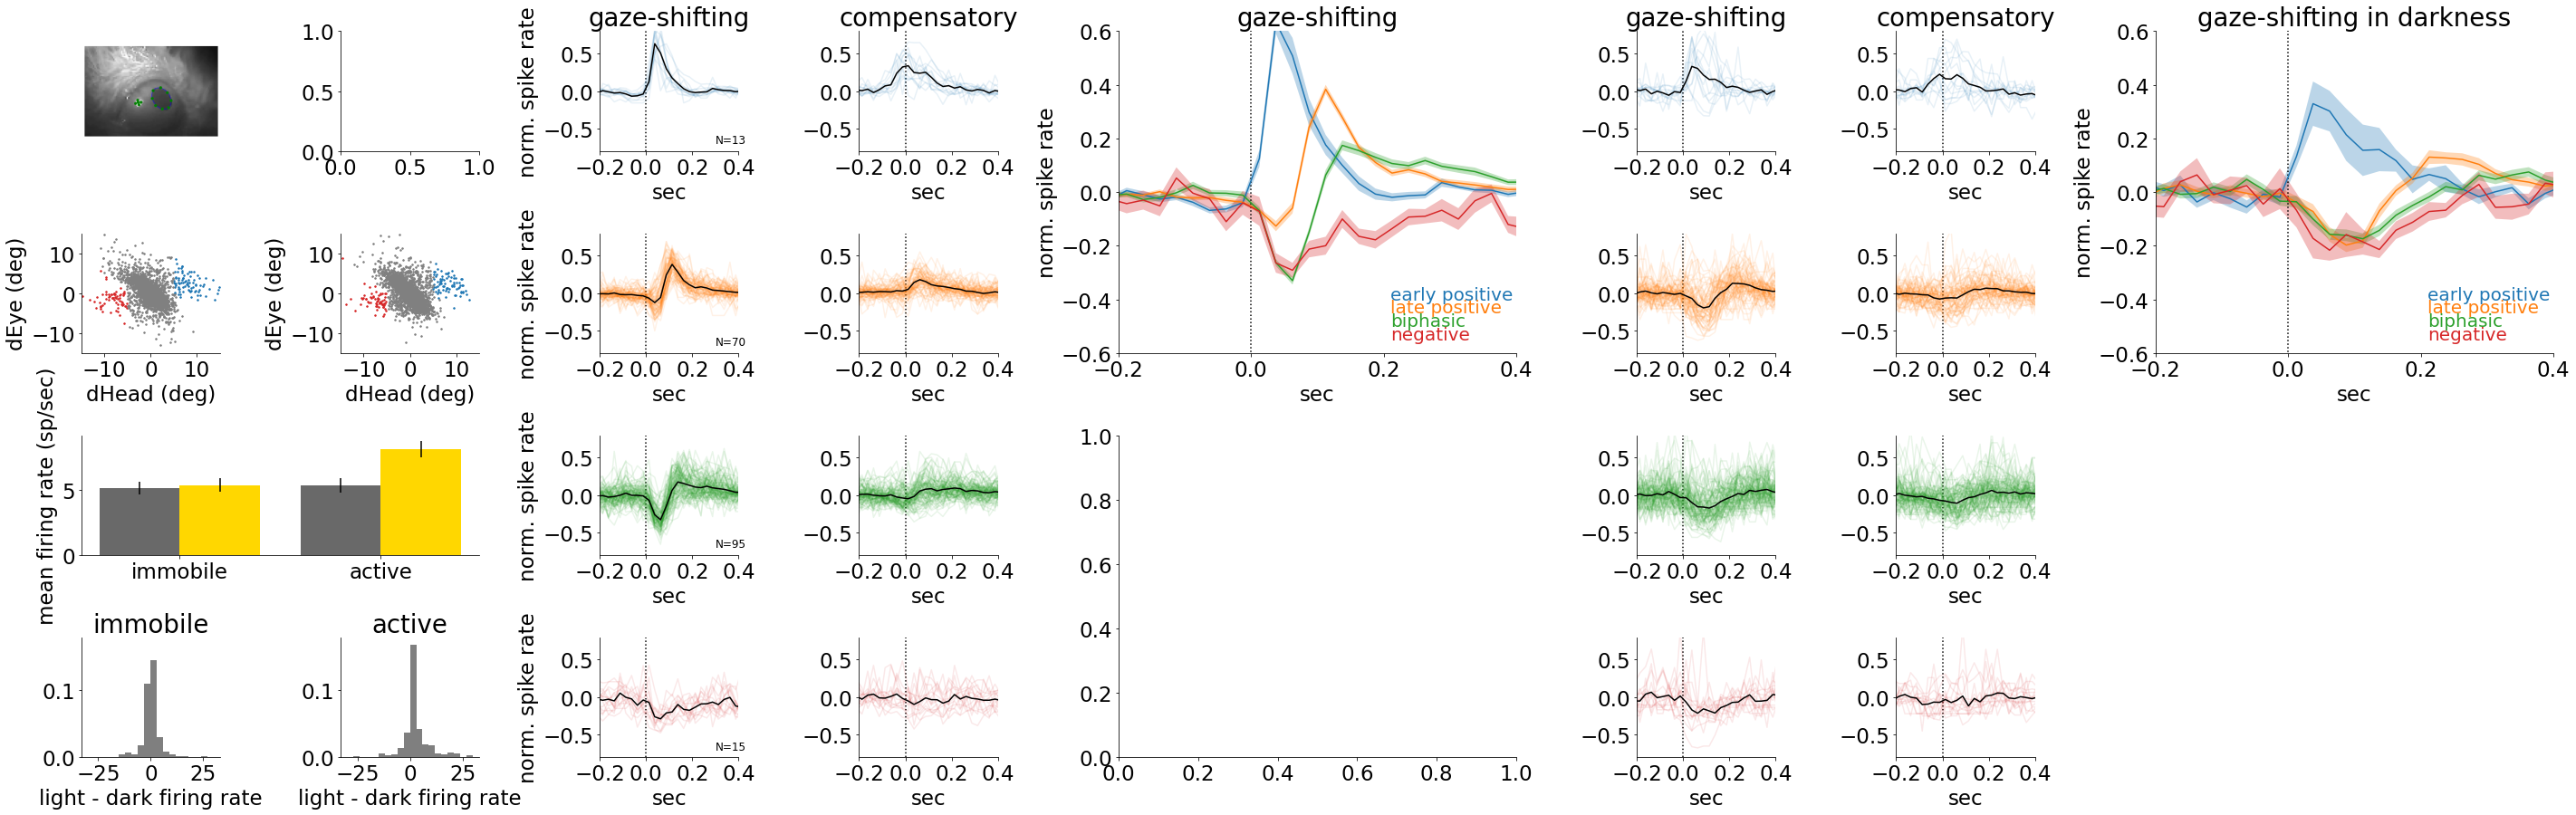

In [87]:
# fig4: light vs dark
fig4 = plt.figure(constrained_layout=True, figsize=(40,13))
spec4 = gridspec.GridSpec(ncols=10, nrows=4, figure=fig4)

# light
# light_schematic = fig4.add_subplot(spec4[0,0])
light_eye_frame = fig4.add_subplot(spec4[0,0])
light_deye_dhead = fig4.add_subplot(spec4[1,0])

# dark
# dark_schematic = fig4.add_subplot(spec4[0,1])
dark_eye_frame = fig4.add_subplot(spec4[0,1])
dark_deye_dhead = fig4.add_subplot(spec4[1,1])

# firing rates
firing_rate = fig4.add_subplot(spec4[2,0:2])
immobile_rate = fig4.add_subplot(spec4[3,0])
active_rate = fig4.add_subplot(spec4[3,1])

# light psth
light_early_gaze = fig4.add_subplot(spec4[0,2])
light_late_gaze = fig4.add_subplot(spec4[1,2])
light_biphasic_gaze = fig4.add_subplot(spec4[2,2])
light_negative_gaze = fig4.add_subplot(spec4[3,2])

light_early_comp = fig4.add_subplot(spec4[0,3])
light_late_comp = fig4.add_subplot(spec4[1,3])
light_biphasic_comp = fig4.add_subplot(spec4[2,3])
light_negative_comp = fig4.add_subplot(spec4[3,3])

light_summary = fig4.add_subplot(spec4[0:2,4:6])
light_frac_dist = fig4.add_subplot(spec4[2:4,4:6])

# dark psth
dark_early_gaze = fig4.add_subplot(spec4[0,6])
dark_late_gaze = fig4.add_subplot(spec4[1,6])
dark_biphasic_gaze = fig4.add_subplot(spec4[2,6])
dark_negative_gaze = fig4.add_subplot(spec4[3,6])

dark_early_comp = fig4.add_subplot(spec4[0,7])
dark_late_comp = fig4.add_subplot(spec4[1,7])
dark_biphasic_comp = fig4.add_subplot(spec4[2,7])
dark_negative_comp = fig4.add_subplot(spec4[3,7])

dark_summary = fig4.add_subplot(spec4[0:2,8:10])
# dark_frac_dist = fig4.add_subplot(spec4[2:4,8:10])

# populate panels
light_schematic.imshow(plt.imread('/home/niell_lab/Documents/figures/paper_schematics/fm.png'))
light_schematic.axis('off')

light_eye_frame.imshow(plt.imread('/home/niell_lab/Documents/figures/paper_schematics/eye_ellipse.png'))
light_eye_frame.axis('off')

demo_data = ltdk_pop.data[ltdk_pop.data['session']=='102721_J558NC_control_Rig2']

dgaze = demo_data['fm1_dEye'].iloc[0] + demo_data['fm1_dHead'].iloc[0](demo_data['fm1_eyeT'].iloc[0][:-1])
deye = demo_data['fm1_dEye'].iloc[0]
eyeT = demo_data['fm1_eyeT'].iloc[0]
dhead = demo_data['fm1_dHead'].iloc[0](demo_data['fm1_eyeT'].iloc[0][:-1])
sthresh = 5
right = eyeT[(np.append(deye, 0) > sthresh) & (np.append(dgaze,0) > sthresh)]
left = eyeT[(np.append(deye, 0) < -sthresh) & (np.append(dgaze,0) < -sthresh)]
compinds = [f for f in np.arange(0,len(deye)) if f not in right.frame.values and f not in left.frame.values]
light_deye_dhead.plot(deye[right.frame.values][::10], dhead[right.frame.values][::10], '.', color='tab:blue', markersize=3)
light_deye_dhead.plot(deye[left.frame.values][::10], dhead[left.frame.values][::10], '.', color='tab:red', markersize=3)
light_deye_dhead.plot(deye[compinds][::10], dhead[compinds][::10], '.', color='gray', markersize=3)
light_deye_dhead.set_ylabel('dEye (deg)')
light_deye_dhead.set_xlabel('dHead (deg)')
light_deye_dhead.set_ylim([-15,15])
light_deye_dhead.set_xlim([-15,15])

dgaze = demo_data['fm_dark_dEye'].iloc[0] + demo_data['fm_dark_dHead'].iloc[0](demo_data['fm_dark_eyeT'].iloc[0][:-1])
deye = demo_data['fm_dark_dEye'].iloc[0]
eyeT = demo_data['fm_dark_eyeT'].iloc[0]
dhead = demo_data['fm_dark_dHead'].iloc[0](demo_data['fm_dark_eyeT'].iloc[0][:-1])
sthresh = 5
right = eyeT[(np.append(deye, 0) > sthresh) & (np.append(dgaze,0) > sthresh)]
left = eyeT[(np.append(deye, 0) < -sthresh) & (np.append(dgaze,0) < -sthresh)]
compinds = [f for f in np.arange(0,len(deye)) if f not in right.frame.values and f not in left.frame.values]
dark_deye_dhead.plot(deye[right.frame.values][::10], dhead[right.frame.values][::10], '.', color='tab:blue', markersize=3)
dark_deye_dhead.plot(deye[left.frame.values][::10], dhead[left.frame.values][::10], '.', color='tab:red', markersize=3)
dark_deye_dhead.plot(deye[compinds][::10], dhead[compinds][::10], '.', color='gray', markersize=3)
dark_deye_dhead.set_ylabel('dEye (deg)')
dark_deye_dhead.set_xlabel('dHead (deg)')
dark_deye_dhead.set_ylim([-15,15])
dark_deye_dhead.set_xlim([-15,15])

firing_rate.bar(0.1, np.mean(ltdk_pop.data['fm_dark_stationary_rec_rate']),
        yerr=(np.nanstd(ltdk_pop.data['fm_dark_stationary_rec_rate'])/np.sqrt(np.size(ltdk_pop.data['fm_dark_stationary_rec_rate']))),
        color='dimgray', width=.8)
firing_rate.bar(0.9, np.mean(ltdk_pop.data['fm1_stationary_rec_rate']),
        yerr=(np.nanstd(ltdk_pop.data['fm1_stationary_rec_rate'])/np.sqrt(np.size(ltdk_pop.data['fm1_stationary_rec_rate']))),
        color='gold', width=.8)
firing_rate.bar(2.1, np.mean(ltdk_pop.data['fm_dark_active_rec_rate']),
        yerr=(np.nanstd(ltdk_pop.data['fm_dark_active_rec_rate'])/np.sqrt(np.size(ltdk_pop.data['fm_dark_active_rec_rate']))),
        color='dimgray', width=.8)
firing_rate.bar(2.9, np.mean(ltdk_pop.data['fm1_active_rec_rate']),
        yerr=(np.nanstd(ltdk_pop.data['fm1_active_rec_rate'])/np.sqrt(np.size(ltdk_pop.data['fm1_active_rec_rate']))),
        color='gold', width=.8)
firing_rate.set_ylabel('mean firing rate (sp/sec)')
firing_rate.set_xticks([0.5,2.5])
firing_rate.set_xticklabels(['immobile','active'])

psth_colors = ['tab:blue','tab:orange','tab:green','tab:red']
psth_keys = ['early','late','biphasic','negative']
for panelnum, panel in enumerate([light_early_gaze, light_late_gaze, light_biphasic_gaze, light_negative_gaze,
                                  light_early_comp, light_late_comp, light_biphasic_comp, light_negative_comp,
                                  dark_early_gaze, dark_late_gaze, dark_biphasic_gaze, dark_negative_gaze,
                                  dark_early_comp, dark_late_comp, dark_biphasic_comp, dark_negative_comp]):
    if panelnum==0:
        panel.set_title('gaze-shifting')
        use_movement_type = 'norm_deflection_at_pref_direction'
    elif panelnum==4:
        panel.set_title('compensatory')
        use_movement_type = 'norm_deflection_at_opp_direction_comp'
    if panelnum==8:
        panel.set_title('gaze-shifting')
        use_movement_type = 'dark_gaze_shift_using_light_direction_pref'
    elif panelnum==12:
        panel.set_title('compensatory')
        use_movement_type = 'dark_comp_using_light_direction_opp'
    
    color = psth_colors[panelnum%4]
    psth_key = psth_keys[panelnum%4]
    all_psth = flatten_series(ltdk_pop.data[use_movement_type][ltdk_pop.data['movement_psth_type_simple']==psth_key])
    for i in range(len(all_psth)):
        panel.plot(ltdk_pop.trange_x, all_psth[i], color=color, alpha=0.1)
    panel.plot(ltdk_pop.trange_x, np.nanmean(all_psth,0), color='k')
    panel.set_xlabel('sec')
    panel.set_ylim([-0.8,0.8])
    panel.set_xlim([-0.2,0.4])
    panel.set_xticks(np.arange(-0.2,0.4,0.2))
    panel.vlines(0,-1,1,linestyles='dotted',colors='k')
    if panelnum<4 or (7>panelnum>12):
        panel.annotate('N='+str(len(all_psth)), xy=[0.3,-0.7], color='k', fontsize=12)
        panel.set_ylabel('norm. spike rate')
        
for count, label in enumerate(psth_keys):
    cluster = flatten_series(ltdk_pop.data['norm_deflection_at_pref_direction'][ltdk_pop.data['movement_psth_type_simple']==label])
    cluster_mean = np.nanmean(cluster, 0)
    cluster_stderr = np.std(cluster,0) / np.sqrt(np.size(cluster,0))
    light_summary.plot(ltdk_pop.trange_x, cluster_mean)
    light_summary.fill_between(ltdk_pop.trange_x, cluster_mean-cluster_stderr, cluster_mean+cluster_stderr, alpha=0.3)
light_summary.annotate('early positive', xy=[0.21,-0.4], color='tab:blue', fontsize=20)
light_summary.annotate('late positive', xy=[0.21,-0.45], color='tab:orange', fontsize=20)
light_summary.annotate('biphasic', xy=[0.21,-0.5], color='tab:green', fontsize=20)
light_summary.annotate('negative', xy=[0.21,-0.55], color='tab:red', fontsize=20)
light_summary.set_xlim([-0.2,0.4])
light_summary.set_ylim([-0.6,0.6])
light_summary.vlines(0,-1,1,linestyles='dotted',colors='k')
light_summary.set_title('gaze-shifting')
light_summary.set_xticks(np.arange(-0.2,0.4,0.2))
light_summary.set_xlabel('sec')
light_summary.set_ylabel('norm. spike rate')

# sessions = ltdk_pop.data['session'].unique()
# for count, session in enumerate(sessions):
#     occ = ltdk_pop.data['movement_psth_type_simple'][ltdk_pop.data['session']==session].value_counts() / len(ltdk_pop.data[ltdk_pop.data['session']==session])
#     runtot = 0
#     if 'unresponsive' in occ:
#         light_frac_dist.bar(count, bottom=runtot, height=occ['unresponsive'], color='tab:gray')
#         runtot += occ['unresponsive']
#     if 'negative' in occ:
#         light_frac_dist.bar(count, bottom=runtot, height=occ['negative'], color='tab:red')
#         runtot += occ['negative']
#     if 'biphasic' in occ:
#         light_frac_dist.bar(count, bottom=runtot, height=occ['biphasic'], color='tab:green')
#         runtot += occ['biphasic']
#     if 'late' in occ:
#         light_frac_dist.bar(count, bottom=runtot, height=occ['late'], color='tab:orange')
#         runtot += occ['late']
#     if 'early' in occ:
#         light_frac_dist.bar(count, bottom=runtot, height=occ['early'], color='tab:blue')
#         runtot += occ['early']
# light_frac_dist.set_xticks(np.arange(len(sessions)))
# light_frac_dist.set_xlabel('animal')
# light_frac_dist.set_ylabel('proportion of neurons')

for count, label in enumerate(psth_keys):
    cluster = flatten_series(ltdk_pop.data['dark_gaze_shift_using_light_direction_pref'][ltdk_pop.data['movement_psth_type_simple']==label])
    cluster_mean = np.nanmean(cluster, 0)
    cluster_stderr = np.std(cluster,0) / np.sqrt(np.size(cluster,0))
    dark_summary.plot(ltdk_pop.trange_x, cluster_mean)
    dark_summary.fill_between(ltdk_pop.trange_x, cluster_mean-cluster_stderr, cluster_mean+cluster_stderr, alpha=0.3)
dark_summary.annotate('early positive', xy=[0.21,-0.4], color='tab:blue', fontsize=20)
dark_summary.annotate('late positive', xy=[0.21,-0.45], color='tab:orange', fontsize=20)
dark_summary.annotate('biphasic', xy=[0.21,-0.5], color='tab:green', fontsize=20)
dark_summary.annotate('negative', xy=[0.21,-0.55], color='tab:red', fontsize=20)
dark_summary.set_xlim([-0.2,0.4])
dark_summary.set_ylim([-0.6,0.6])
dark_summary.vlines(0,-1,1,linestyles='dotted',colors='k')
dark_summary.set_title('gaze-shifting in darkness')
dark_summary.set_xticks(np.arange(-0.2,0.4,0.2))
dark_summary.set_xlabel('sec')
dark_summary.set_ylabel('norm. spike rate')

immobile_rate.hist(ltdk_pop.data['fm1_stationary_rec_rate'] - ltdk_pop.data['fm_dark_stationary_rec_rate'], density=True, bins=np.arange(-30, 33, 3), color='tab:gray')
immobile_rate.set_xlabel('light - dark firing rate')
immobile_rate.set_title('immobile')
immobile_rate.set_ylim([0,0.18])

active_rate.hist(ltdk_pop.data['fm1_active_rec_rate'] - ltdk_pop.data['fm_dark_active_rec_rate'], density=True, bins=np.arange(-30, 33, 3), color='tab:gray')
active_rate.set_xlabel('light - dark firing rate')
active_rate.set_title('active')
active_rate.set_ylim([0,0.18])

fig4.tight_layout()
fig4.savefig('/home/niell_lab/Desktop/fig4_010322.pdf')

(0.0, 0.18)

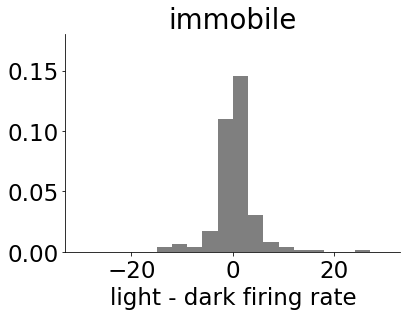

In [84]:
fig, ax = plt.subplots()
ax.hist(ltdk_pop.data['fm1_stationary_rec_rate'] - ltdk_pop.data['fm_dark_stationary_rec_rate'], density=True, bins=np.arange(-30, 33, 3), color='tab:gray')
ax.set_xlabel('light - dark firing rate')
ax.set_title('immobile')
# for scount, sname in enumerate(ltdk_pop.data['session'].unique()):
#     light = ltdk_pop.data['fm1_stationary_rec_rate'][ltdk_pop.data['session']==sname]
#     dark = ltdk_pop.data['fm_dark_stationary_rec_rate'][ltdk_pop.data['session']==sname]
#     plt.vlines(np.nanmean(light-dark), 0, 1, colors='tab:blue')
ax.set_ylim([0,0.18])

(0.0, 0.18)

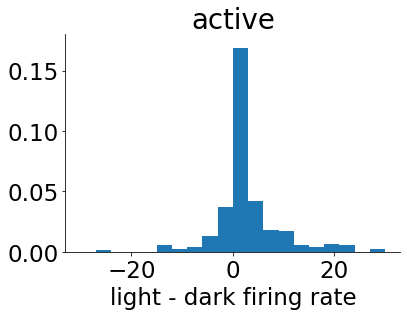

In [79]:
fig, ax = plt.subplots()
ax.hist(ltdk_pop.data['fm1_active_rec_rate'] - ltdk_pop.data['fm_dark_active_rec_rate'], density=True, bins=np.arange(-30, 33, 3), color='k')
ax.set_xlabel('light - dark firing rate')
ax.set_title('active')
ax.set_ylim([0,0.18])

In [69]:
np.arange(-26, 55, 3)

array([-26, -23, -20, -17, -14, -11,  -8,  -5,  -2,   1,   4,   7,  10,
        13,  16,  19,  22,  25,  28,  31,  34,  37,  40,  43,  46,  49,
        52])

In [67]:
np.max(ltdk_pop.data['fm1_active_rec_rate'] - ltdk_pop.data['fm_dark_active_rec_rate'])

52.791095954280095

[Text(0.5, 0, 'immobile'), Text(2.5, 0, 'active')]

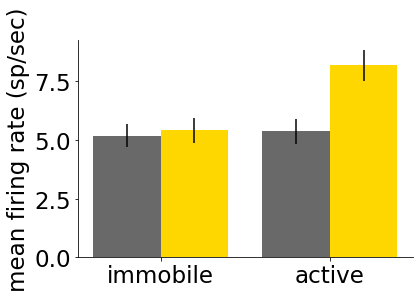

In [57]:
fig, ax = plt.subplots()
ax.bar(0.1, np.mean(ltdk_pop.data['fm_dark_stationary_rec_rate']),
        yerr=(np.nanstd(ltdk_pop.data['fm_dark_stationary_rec_rate'])/np.sqrt(np.size(ltdk_pop.data['fm_dark_stationary_rec_rate']))),
        color='dimgray', width=.8)
ax.bar(0.9, np.mean(ltdk_pop.data['fm1_stationary_rec_rate']),
        yerr=(np.nanstd(ltdk_pop.data['fm1_stationary_rec_rate'])/np.sqrt(np.size(ltdk_pop.data['fm1_stationary_rec_rate']))),
        color='gold', width=.8)
ax.bar(2.1, np.mean(ltdk_pop.data['fm_dark_active_rec_rate']),
        yerr=(np.nanstd(ltdk_pop.data['fm_dark_active_rec_rate'])/np.sqrt(np.size(ltdk_pop.data['fm_dark_active_rec_rate']))),
        color='dimgray', width=.8)
ax.bar(2.9, np.mean(ltdk_pop.data['fm1_active_rec_rate']),
        yerr=(np.nanstd(ltdk_pop.data['fm1_active_rec_rate'])/np.sqrt(np.size(ltdk_pop.data['fm1_active_rec_rate']))),
        color='gold', width=.8)
ax.set_ylabel('mean firing rate (sp/sec)')
ax.set_xticks([0.5,2.5])
ax.set_xticklabels(['immobile','active'])


Text(0, 0.5, 'mean firing rate')

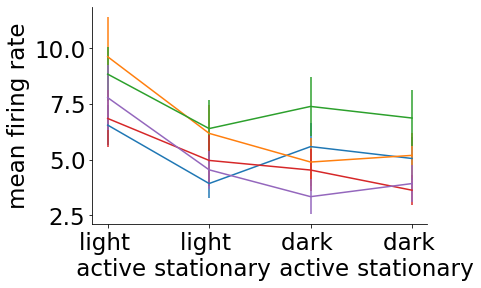

In [44]:
fig, ax = plt.subplots()
for scount, sname in enumerate(ltdk_pop.data['session'].unique()):
    animal = ltdk_pop.data[ltdk_pop.data['session']==sname]
    lt_active = animal['fm1_active_rec_rate'].to_numpy()
    lt_still = animal['fm1_stationary_rec_rate'].to_numpy()
    dk_active = animal['fm_dark_active_rec_rate'].to_numpy()
    dk_still = animal['fm_dark_stationary_rec_rate'].to_numpy()
    
    cond_means = np.array([np.mean(lt_active),
                          np.mean(lt_still),
                          np.mean(dk_active),
                          np.mean(dk_still)])
    cond_errs = np.array([np.nanstd(lt_active) / np.sqrt(len(lt_active)),
                          np.nanstd(lt_still) / np.sqrt(len(lt_still)),
                          np.nanstd(dk_active) / np.sqrt(len(dk_active)),
                          np.nanstd(dk_still) / np.sqrt(len(dk_still))])
    
    ax.errorbar(range(4), cond_means, yerr=cond_errs)
ax.set_xticks(range(4))
ax.set_xticklabels(['light \n active','light \n stationary','dark \n active','dark \n stationary'])
ax.set_ylabel('mean firing rate')

In [ ]:
plt.subplots(1,4,figsize=(10,4))
for scount, sname in enumerate(ltdk_pop.data['session'].unique()):
    animal = sname.split('_')[1]
    hffm_sname = [s for s in hffm_pop.data['session'].unique() if animal in s]
    if hffm_sname == []:
        continue
    else:
        hffm_sname = hffm_sname[0]
    plt.subplot(1,4,scount)
    ltdk_occ = ltdk_pop.data['movement_psth_type_simple'][ltdk_pop.data['session']==sname].value_counts()# / len(ltdk_pop.data[ltdk_pop.data['session']==sname])
    hffm_occ = hffm_pop.data['movement_psth_type_simple'][hffm_pop.data['session']==hffm_sname].value_counts()# / len(hffm_pop.data[hffm_pop.data['session']==hffm_sname])
    for count, occ in enumerate([ltdk_occ,hffm_occ]):
        runtot = 0
        if 'unresponsive' in occ:
            plt.bar(count, bottom=runtot, height=occ['unresponsive'], color='tab:gray')
            runtot += occ['unresponsive']
        if 'negative' in occ:
            plt.bar(count, bottom=runtot, height=occ['negative'], color='tab:red')
            runtot += occ['negative']
        if 'biphasic' in occ:
            plt.bar(count, bottom=runtot, height=occ['biphasic'], color='tab:green')
            runtot += occ['biphasic']
        if 'late' in occ:
            plt.bar(count, bottom=runtot, height=occ['late'], color='tab:orange')
            runtot += occ['late']
        if 'early' in occ:
            plt.bar(count, bottom=runtot, height=occ['early'], color='tab:blue')
            runtot += occ['early']
    plt.title(animal)
    plt.xticks(range(2), labels=['ltdk','hffm'])
plt.tight_layout()

In [ ]:
hffm_sname = [s for s in hffm_pop.data['session'].unique() if 'J559NC' in s]
hffm_sname

In [ ]:
for scount, sname in enumerate(hffm_pop.data['session'].unique()):
    print(sname)

In [ ]:
sessions = ltdk_pop.data['session'].unique()
for count, session in enumerate(sessions):
    occ = ltdk_pop.data['movement_psth_type_simple'][ltdk_pop.data['session']==session].value_counts() / len(ltdk_pop.data[ltdk_pop.data['session']==session])
    runtot = 0
    if 'unresponsive' in occ:
        light_frac_dist.bar(count, bottom=runtot, height=occ['unresponsive'], color='tab:gray')
        runtot += occ['unresponsive']
    if 'negative' in occ:
        light_frac_dist.bar(count, bottom=runtot, height=occ['negative'], color='tab:red')
        runtot += occ['negative']
    if 'biphasic' in occ:
        light_frac_dist.bar(count, bottom=runtot, height=occ['biphasic'], color='tab:green')
        runtot += occ['biphasic']
    if 'late' in occ:
        light_frac_dist.bar(count, bottom=runtot, height=occ['late'], color='tab:orange')
        runtot += occ['late']
    if 'early' in occ:
        light_frac_dist.bar(count, bottom=runtot, height=occ['early'], color='tab:blue')
        runtot += occ['early']
light_frac_dist.set_xticks(np.arange(len(sessions)))
light_frac_dist.set_xlabel('animal')
light_frac_dist.set_ylabel('proportion of neurons')